In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_demographics = pd.read_excel(r'Telco_customer_churn_demographics.xlsx')
df_location = pd.read_csv(r'Telco_customer_churn_location.csv')
df_population = pd.read_excel(r'Telco_customer_churn_population.xlsx')
df_services = pd.read_excel(r'Telco_customer_churn_services.xlsx')
df_status = pd.read_excel(r'Telco_customer_churn_statuss.xlsx')

In [4]:
df_demographics.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [5]:
df_location.head()

,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [6]:
df_population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [7]:
df_services.head()

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [8]:
df_status.head()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,Price,Extra data charges


### Initial Data Clean Up

In [9]:
df_demographics.rename(columns={
    'Customer ID': 'customer_id',
    'Count': 'count',
    'Gender': 'gender',
    'Age': 'age',
    'Under 30': 'under_30',
    'Senior Citizen': 'senior_citizen',
    'Married': 'married',
    'Dependents': 'dependents',
    'Number of Dependents': 'number_of_dependents'
}, inplace = True)

In [10]:
df_demographics.head()

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [11]:
df_location.columns

Index(['Location ID', 'Customer ID', 'Count', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
df_location.rename(columns={
    'Location ID':'location_id', 'Customer ID':'customer_id', 'Count':'count', 'Country':'country', 'State':'state', 'City':'city',
       'Zip Code':'zip_code', 'Lat Long':'lat_long', 'Latitude':'latitude', 'Longitude':'longitude'}, inplace = True)

In [13]:
df_location.head()

,location_id,customer_id,count,country,state,city,zip_code,lat_long,latitude,longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [14]:
df_population.columns

Index(['ID', 'Zip Code', 'Population'], dtype='object')

In [15]:
df_population.rename(columns={
    'ID':'id', 'Zip Code':'zip_code', 'Population':'population'}, inplace = True)

In [16]:
df_population.head()

,id,zip_code,population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [17]:
df_services.columns

Index(['Service ID', 'Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [18]:
df_services.rename(columns={
    'Service ID':'service_id', 'Customer ID':'customer_id', 'Count':'count', 'Quarter':'quarter', 'Referred a Friend':'referred_a_friend',
       'Number of Referrals':'number_of_referrals', 'Tenure in Months':'tenure_in_months', 'Offer':'offer', 'Phone Service':'phone_service',
       'Avg Monthly Long Distance Charges':'avg_monthly_long_dist_charges', 'Multiple Lines':'multiple_lines',
       'Internet Service':'internet_service', 'Internet Type':'internet_type', 'Avg Monthly GB Download':'avg_monthly_GB_download',
       'Online Security':'online_security', 'Online Backup':'online_backup', 'Device Protection Plan':'device_protection_plan',
       'Premium Tech Support':'premium_tech_support', 'Streaming TV':'streaming_tv', 'Streaming Movies':'streaming_movies',
       'Streaming Music':'streaming_music', 'Unlimited Data':'unlimited_data', 'Contract':'contract', 'Paperless Billing':'paperless_billing',
       'Payment Method':'payment_method', 'Monthly Charge':'monthly_charge', 'Total Charges':'total_charges', 'Total Refunds':'total_refunds',
       'Total Extra Data Charges':'total_extra_data_charges', 'Total Long Distance Charges':'total_long_dist_charges',
       'Total Revenue':'total_revenue'}, inplace = True)

In [19]:
df_services.head()

,service_id,customer_id,count,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [20]:
df_status.columns

Index(['Status ID', 'Customer ID', 'Count', 'Quarter', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [21]:
df_status.rename(columns={
    'Status ID':'status_id', 'Customer ID':'customer_id', 'Count':'count', 'Quarter':'quarter', 'Satisfaction Score':'satisf_score',
       'Customer Status':'customer_status', 'Churn Label':'churn_label', 'Churn Value':'churn_value', 'Churn Score':'churn_score', 'Churn Category':'churn_cat', 'Churn Reason':'churn_reason'
}, inplace = True)

In [22]:
df_status.head()

,status_id,customer_id,count,quarter,satisf_score,customer_status,churn_label,churn_value,churn_score,churn_cat,churn_reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,Price,Extra data charges


**Merge Dataframes**

In [23]:
df_data = pd.merge(df_demographics, df_location, on = ['customer_id', 'count'])
df_data

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,location_id,country,state,city,zip_code,lat_long,latitude,longitude
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,FCCECI8494,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,HEHUQY7254,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,WIUHRF2613,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,CFEZBF4415,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,XVCVGG7664,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,NOTKAT3139,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,IIQJBU2929,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,PBNAHR7564,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


In [24]:
df_data = pd.merge(df_data, df_population, on = 'zip_code')
df_data

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,location_id,country,state,city,zip_code,lat_long,latitude,longitude,id,population
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,MBQVVO3283,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
2,5043-TRZWM,1,Female,32,No,No,No,No,0,ROOGSG2375,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,FPZYTZ4319,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,USOOKX2411,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,YNUPWU7293,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,TRSRYD5638,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,ECJPPS3373,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,FAPIXA9191,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062


In [25]:
df_data = pd.merge(df_data, df_services, on = ['customer_id', 'count'])
df_data

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,location_id,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,MBQVVO3283,...,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25
2,5043-TRZWM,1,Female,32,No,No,No,No,0,ROOGSG2375,...,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,FPZYTZ4319,...,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,USOOKX2411,...,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,YNUPWU7293,...,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,TRSRYD5638,...,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,ECJPPS3373,...,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,FAPIXA9191,...,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54


In [26]:
df_data.columns

Index(['customer_id', 'count', 'gender', 'age', 'under_30', 'senior_citizen',
       'married', 'dependents', 'number_of_dependents', 'location_id',
       'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude',
       'longitude', 'id', 'population', 'service_id', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_dist_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_GB_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_dist_charges', 'total_revenue'],
      dtype='object')

In [27]:
df_data = pd.merge(df_data, df_status, on = ['customer_id', 'count', 'quarter'])
df_data

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,location_id,...,total_long_dist_charges,total_revenue,status_id,satisf_score,customer_status,churn_label,churn_value,churn_score,churn_cat,churn_reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,...,0.00,59.65,SWSORB1252,3,Churned,Yes,1,91,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,MBQVVO3283,...,3063.60,8080.25,DFFTSW9423,3,Stayed,No,0,42,NaN,NaN
2,5043-TRZWM,1,Female,32,No,No,No,No,0,ROOGSG2375,...,7.11,82.66,ZQUQGL3189,5,Joined,No,0,34,NaN,NaN
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,FPZYTZ4319,...,0.00,3708.40,GJIIZD8512,3,Stayed,No,0,46,NaN,NaN
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,USOOKX2411,...,255.43,888.88,CKVIIN3951,3,Stayed,No,0,38,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,YNUPWU7293,...,16.06,69.61,BABZIZ1275,4,Joined,No,0,62,NaN,NaN
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,TRSRYD5638,...,1549.71,8882.11,JLWIWU8939,4,Stayed,No,0,26,NaN,NaN
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,ECJPPS3373,...,210.78,1108.53,OUDVAY1482,5,Stayed,No,0,32,NaN,NaN
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,FAPIXA9191,...,979.94,3261.54,OPGYTC4522,5,Stayed,No,0,66,NaN,NaN


In [28]:
df_data.columns


Index(['customer_id', 'count', 'gender', 'age', 'under_30', 'senior_citizen',
       'married', 'dependents', 'number_of_dependents', 'location_id',
       'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude',
       'longitude', 'id', 'population', 'service_id', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_dist_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_GB_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_dist_charges', 'total_revenue',
       'status_id', 'satisf_score', 'customer_status', 'churn_label',
       'churn_value', 'churn_score', 'churn_cat', 

**Data Understanding**

In [29]:
pd.set_option('display.max_columns', None)
df_data.head()

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,location_id,country,state,city,zip_code,lat_long,latitude,longitude,id,population,service_id,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,status_id,satisf_score,customer_status,churn_label,churn_value,churn_score,churn_cat,churn_reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02381,-118.156582,21,68701,IJKDQVSWH3522,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,SWSORB1252,3,Churned,Yes,1,91,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,MBQVVO3283,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02381,-118.156582,21,68701,CYIZJZYVS1767,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,DFFTSW9423,3,Stayed,No,0,42,NaN,NaN
2,5043-TRZWM,1,Female,32,No,No,No,No,0,ROOGSG2375,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02381,-118.156582,21,68701,WXYYRNSZJ7773,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,ZQUQGL3189,5,Joined,No,0,34,NaN,NaN
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,FPZYTZ4319,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02381,-118.156582,21,68701,JCEHXQIWE9319,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,GJIIZD8512,3,Stayed,No,0,46,NaN,NaN
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,USOOKX2411,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02381,-118.156582,21,68701,FISTTIOMZ4566,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,CKVIIN3951,3,Stayed,No,0,38,NaN,NaN


In [30]:
df_data.shape

(7043, 56)

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    7043 non-null   object 
 1   count                          7043 non-null   int64  
 2   gender                         7043 non-null   object 
 3   age                            7043 non-null   int64  
 4   under_30                       7043 non-null   object 
 5   senior_citizen                 7043 non-null   object 
 6   married                        7043 non-null   object 
 7   dependents                     7043 non-null   object 
 8   number_of_dependents           7043 non-null   int64  
 9   location_id                    7043 non-null   object 
 10  country                        7043 non-null   object 
 11  state                          7043 non-null   object 
 12  city                           7043 non-null   o

In [32]:
df_data['count'].unique()

array([1], dtype=int64)

In [33]:
df_data['churn_cat'].unique()

array(['Competitor', nan, 'Dissatisfaction', 'Attitude', 'Price', 'Other'],
      dtype=object)

In [34]:
df_data['churn_reason'].unique()

array(['Competitor offered more data', nan,
       'Competitor made better offer', 'Service dissatisfaction',
       'Limited range of services', 'Attitude of support person',
       'Extra data charges', 'Competitor had better devices',
       "Don't know", 'Lack of affordable download/upload speed',
       'Competitor offered higher download speeds',
       'Product dissatisfaction', 'Moved',
       'Lack of self-service on Website', 'Price too high', 'Deceased',
       'Long distance charges', 'Attitude of service provider',
       'Poor expertise of online support', 'Network reliability',
       'Poor expertise of phone support'], dtype=object)

In [35]:
df_data.loc[df_data['churn_reason'] == 'Lack of self-service on Website','churn_cat':'churn_reason'].head(10)

,churn_cat,churn_reason
53,Dissatisfaction,Lack of self-service on Website
63,Dissatisfaction,Lack of self-service on Website
151,Dissatisfaction,Lack of self-service on Website
270,Dissatisfaction,Lack of self-service on Website
760,Dissatisfaction,Lack of self-service on Website
1285,Dissatisfaction,Lack of self-service on Website
1358,Dissatisfaction,Lack of self-service on Website
1707,Dissatisfaction,Lack of self-service on Website
2276,Dissatisfaction,Lack of self-service on Website
2572,Dissatisfaction,Lack of self-service on Website


In [36]:
# this dataset contains a number of redundant information. It is best to remove some of these columns to avoid redundancy

df_dropped = df_data.drop(['count', 'id', 'lat_long', 'customer_status', 'churn_label', 'location_id', 'service_id', 'status_id'], axis = 1)

In [37]:
df_dropped.shape

(7043, 48)

In [38]:
df_dropped.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'country', 'state', 'city',
       'zip_code', 'latitude', 'longitude', 'population', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_dist_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_GB_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_dist_charges', 'total_revenue',
       'satisf_score', 'churn_value', 'churn_score', 'churn_cat',
       'churn_reason'],
      dtype='object')

In [39]:
df_data.isnull().sum()

customer_id                         0
count                               0
gender                              0
age                                 0
under_30                            0
senior_citizen                      0
married                             0
dependents                          0
number_of_dependents                0
location_id                         0
country                             0
state                               0
city                                0
zip_code                            0
lat_long                            0
latitude                            0
longitude                           0
id                                  0
population                          0
service_id                          0
quarter                             0
referred_a_friend                   0
number_of_referrals                 0
tenure_in_months                    0
offer                               0
phone_service                       0
avg_monthly_

In [40]:
# considerable number of nulls in columns 'churn_cat' and 'churn_reason'
# investigate further

df_dropped.loc[(df_dropped.churn_cat.isnull()) & (df_dropped.churn_reason.isnull())]

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn_value,churn_score,churn_cat,churn_reason
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.00,0,3063.60,8080.25,3,0,42,NaN,NaN
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.00,0,7.11,82.66,5,0,34,NaN,NaN
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.00,0,0.00,3708.40,3,0,46,NaN,NaN
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88,3,0,38,NaN,NaN
6,4918-FYJNT,Female,68,No,Yes,Yes,No,0,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,4,55,None,Yes,22.74,Yes,Yes,Fiber Optic,21,No,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,90.45,5044.80,12.48,0,1250.70,6283.02,4,0,42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,32.649787,-116.223700,699,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.00,0,16.06,69.61,4,0,62,NaN,NaN
7039,0795-GMVQO,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,32.741859,-117.090353,73006,Q3,Yes,1,67,None,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.00,0,1549.71,8882.11,4,0,26,NaN,NaN
7040,9547-ITEFG,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,32.741859,-117.090353,73006,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.00,0,210.78,1108.53,5,0,32,NaN,NaN
7041,4993-JCRGJ,Male,62,No,No,No,No,0,United States,California,Holtville,92250,32.811001,-115.152865,8062,Q3,No,0,26,None,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.00,0,979.94,3261.54,5,0,66,NaN,NaN


In [41]:
# it appears that the reason for the null values in these columns is because the customer did not churn.
# we can further investigate this

df_dropped.loc[(df_dropped.churn_cat.isnull()) & (df_dropped.churn_reason.isnull()) & (df_dropped.churn_value == 0)]

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn_value,churn_score,churn_cat,churn_reason
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.00,0,3063.60,8080.25,3,0,42,NaN,NaN
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.00,0,7.11,82.66,5,0,34,NaN,NaN
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.00,0,0.00,3708.40,3,0,46,NaN,NaN
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88,3,0,38,NaN,NaN
6,4918-FYJNT,Female,68,No,Yes,Yes,No,0,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,4,55,None,Yes,22.74,Yes,Yes,Fiber Optic,21,No,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,90.45,5044.80,12.48,0,1250.70,6283.02,4,0,42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,32.649787,-116.223700,699,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.00,0,16.06,69.61,4,0,62,NaN,NaN
7039,0795-GMVQO,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,32.741859,-117.090353,73006,Q3,Yes,1,67,None,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.00,0,1549.71,8882.11,4,0,26,NaN,NaN
7040,9547-ITEFG,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,32.741859,-117.090353,73006,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.00,0,210.78,1108.53,5,0,32,NaN,NaN
7041,4993-JCRGJ,Male,62,No,No,No,No,0,United States,California,Holtville,92250,32.811001,-115.152865,8062,Q3,No,0,26,None,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.00,0,979.94,3261.54,5,0,66,NaN,NaN


In [42]:
df_dropped.loc[(df_dropped.churn_cat.isnull()) & (df_dropped.churn_reason.isnull()) & (df_dropped.churn_value == 1)]

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn_value,churn_score,churn_cat,churn_reason


In [43]:
# this confirms our assumption
# so we move to fill out null values with apporopriate tags

In [44]:
df_dropped['churn_cat'].fillna('Not Churned', inplace = True)
df_dropped['churn_reason'].fillna('None', inplace = True)

In [45]:
df_dropped.isnull().sum()

customer_id                      0
gender                           0
age                              0
under_30                         0
senior_citizen                   0
married                          0
dependents                       0
number_of_dependents             0
country                          0
state                            0
city                             0
zip_code                         0
latitude                         0
longitude                        0
population                       0
quarter                          0
referred_a_friend                0
number_of_referrals              0
tenure_in_months                 0
offer                            0
phone_service                    0
avg_monthly_long_dist_charges    0
multiple_lines                   0
internet_service                 0
internet_type                    0
avg_monthly_GB_download          0
online_security                  0
online_backup                    0
device_protection_pl

In [46]:
df_dropped.rename(columns={
    'churn_value':'churn'}, inplace = True)

### Exploratory Data Analysis

In [47]:
df_dropped.head()

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,1,91,Competitor,Competitor offered more data
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,0,42,Not Churned,None
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,0,34,Not Churned,None
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,0,46,Not Churned,None
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,0,38,Not Churned,None


In [48]:
# let's get the churn ratio in this dataset

(df_dropped.churn.value_counts()/len(df_dropped.churn))*100

0    73.463013
1    26.536987
Name: churn, dtype: float64

In [49]:
# from this we can see that a large percentage of the customers in the database (73%) were retained.
# let's do EDA to gain insights into what s causing this churn

## Bivariate Analysis

In [50]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    7043 non-null   object 
 1   gender                         7043 non-null   object 
 2   age                            7043 non-null   int64  
 3   under_30                       7043 non-null   object 
 4   senior_citizen                 7043 non-null   object 
 5   married                        7043 non-null   object 
 6   dependents                     7043 non-null   object 
 7   number_of_dependents           7043 non-null   int64  
 8   country                        7043 non-null   object 
 9   state                          7043 non-null   object 
 10  city                           7043 non-null   object 
 11  zip_code                       7043 non-null   int64  
 12  latitude                       7043 non-null   f

In [51]:
binary_category_cols = df_dropped.select_dtypes(include='object').columns.tolist()
binary_category_cols

['customer_id',
 'gender',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'country',
 'state',
 'city',
 'quarter',
 'referred_a_friend',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn_cat',
 'churn_reason']

In [52]:
items_to_remove = ['customer_id', 'country', 'state', 'city', 'quarter', 'offer', 'internet_type', 'contract', 'churn_cat', 'churn_reason']

for item in items_to_remove:
    try:
        binary_category_cols.remove(item)
    except ValueError:
        
        pass

In [53]:
binary_category_cols

['gender',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'referred_a_friend',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'paperless_billing',
 'payment_method']

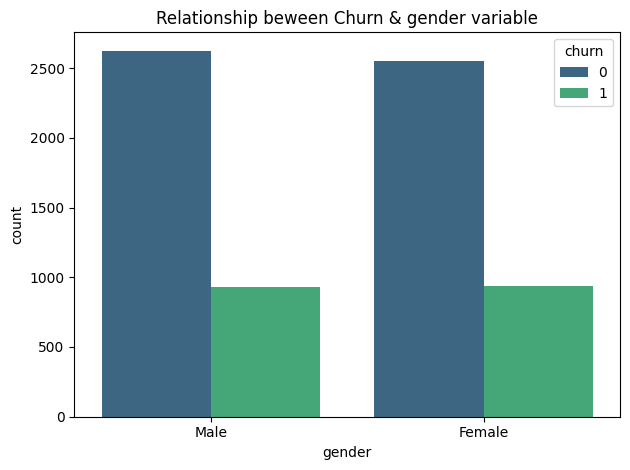

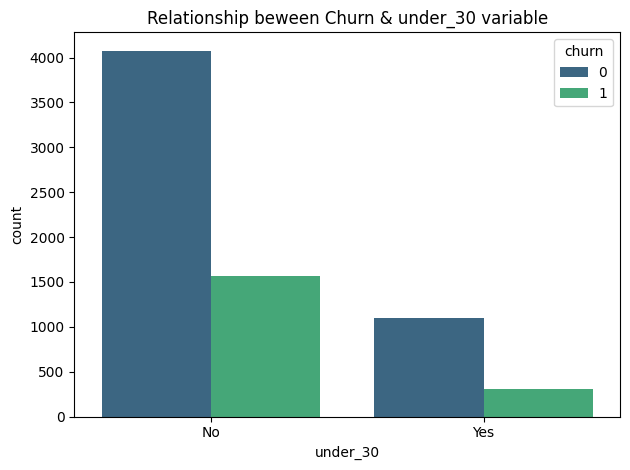

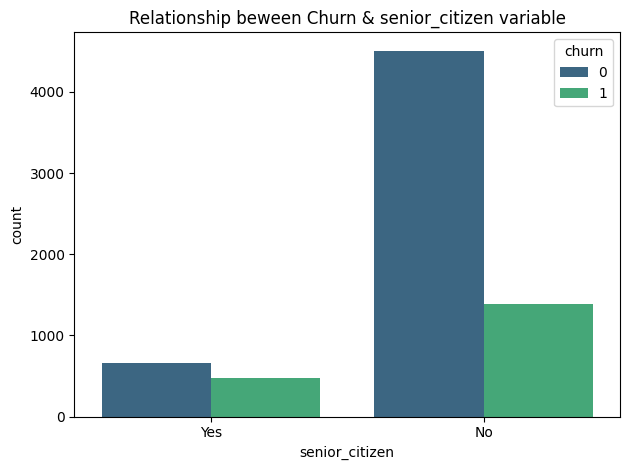

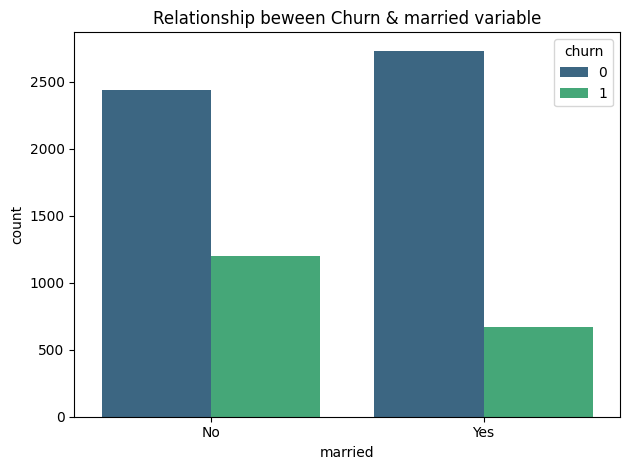

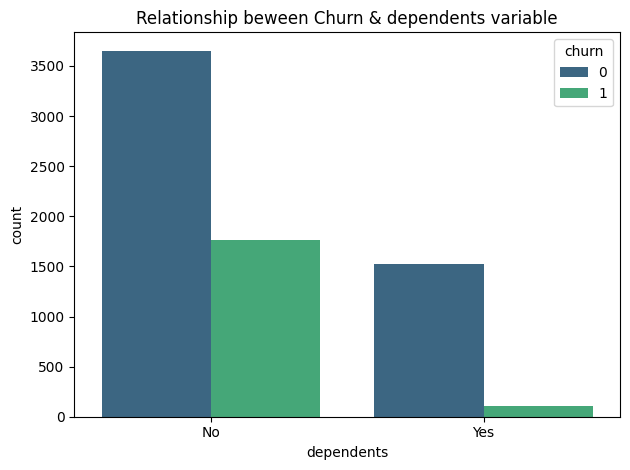

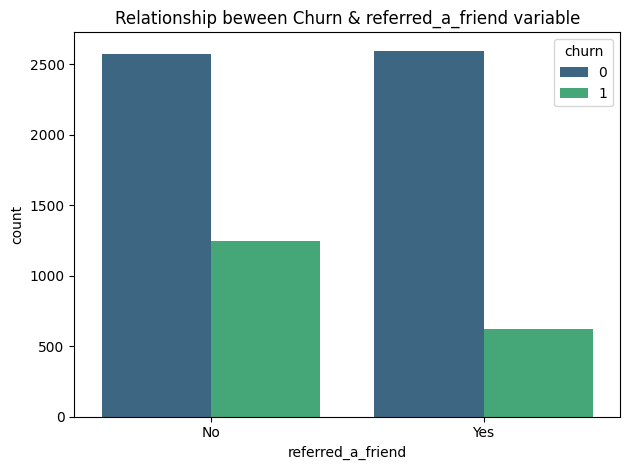

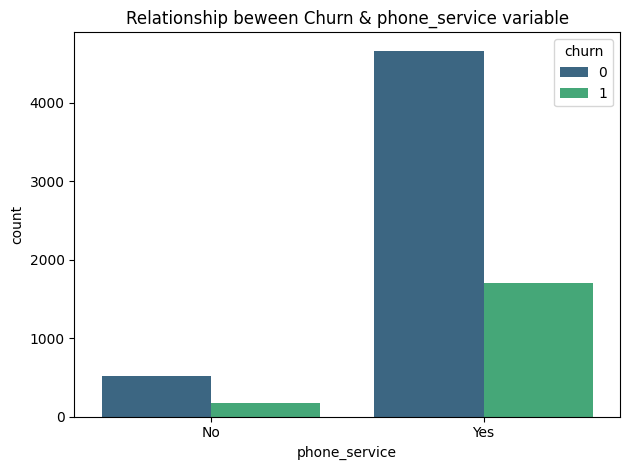

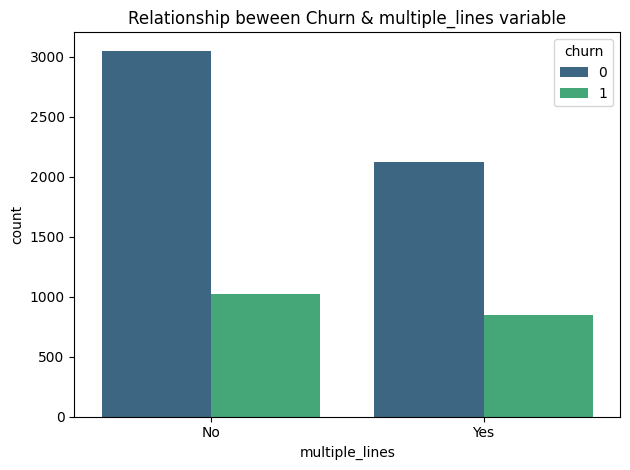

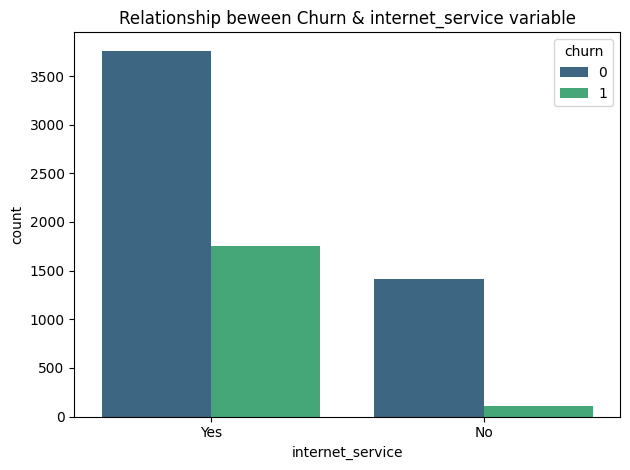

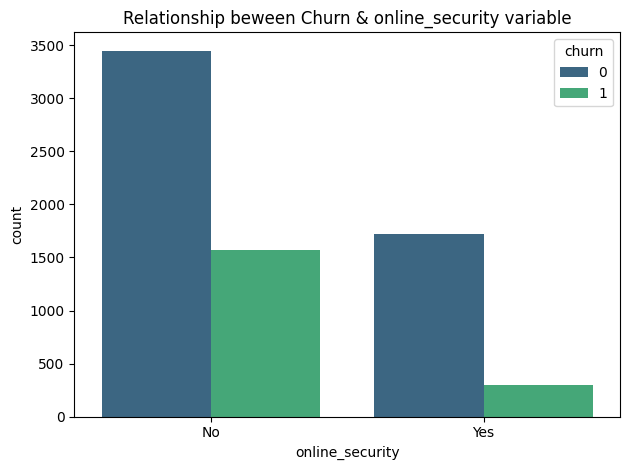

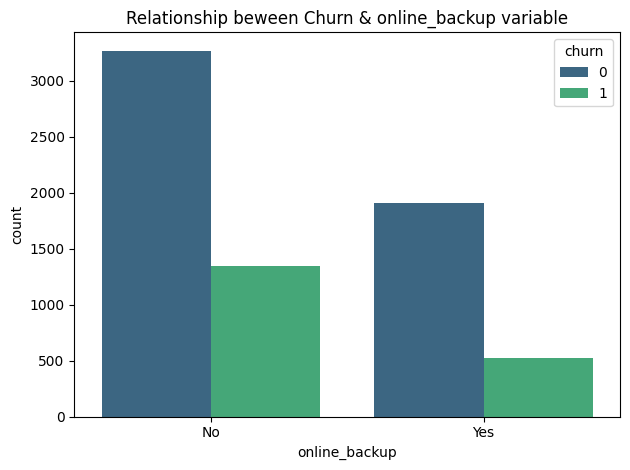

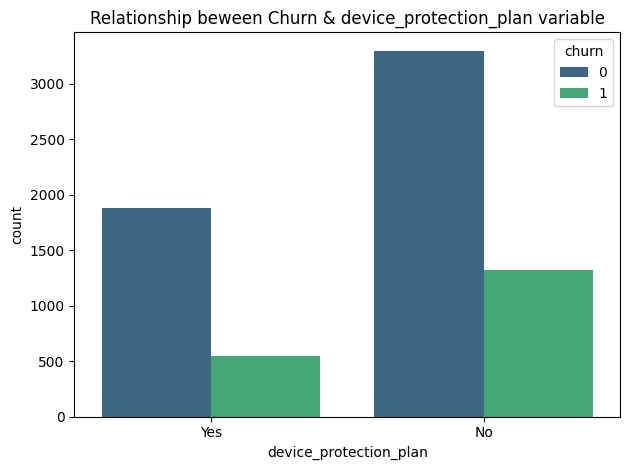

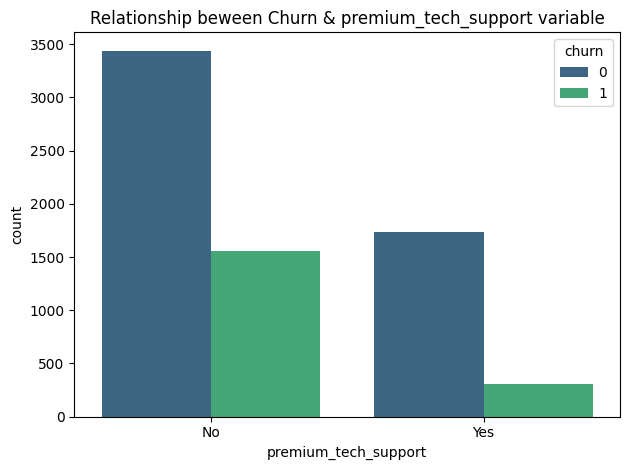

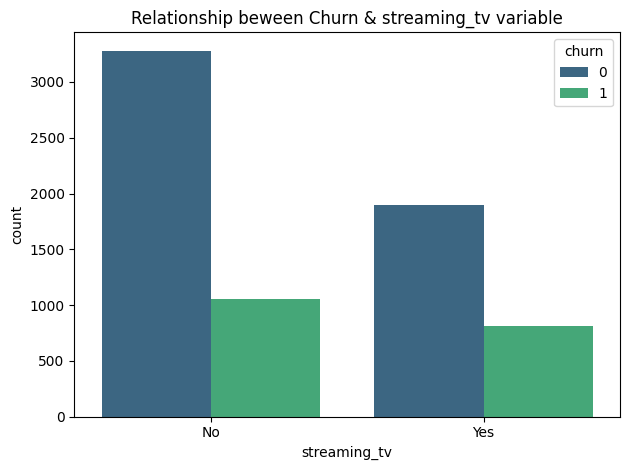

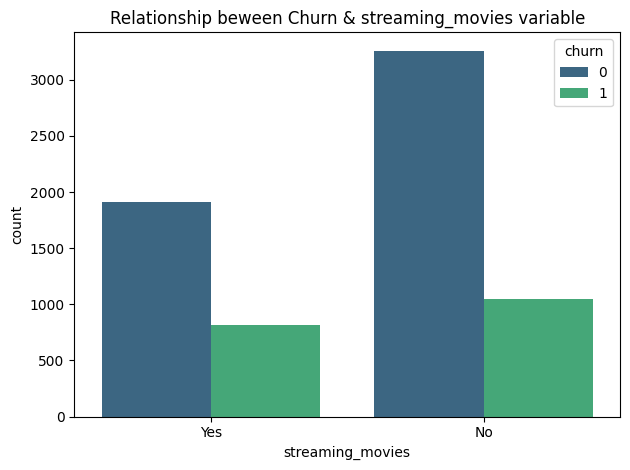

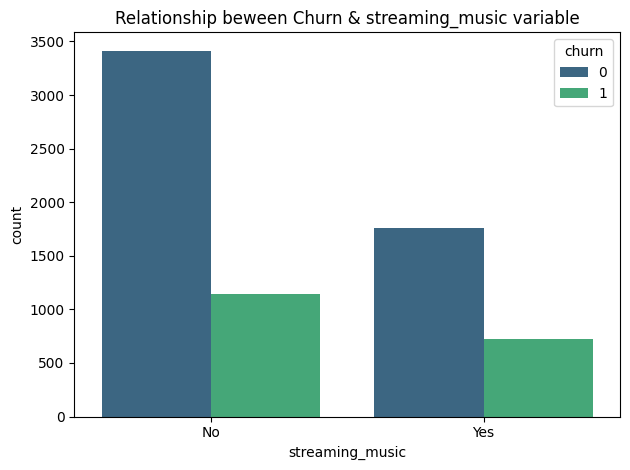

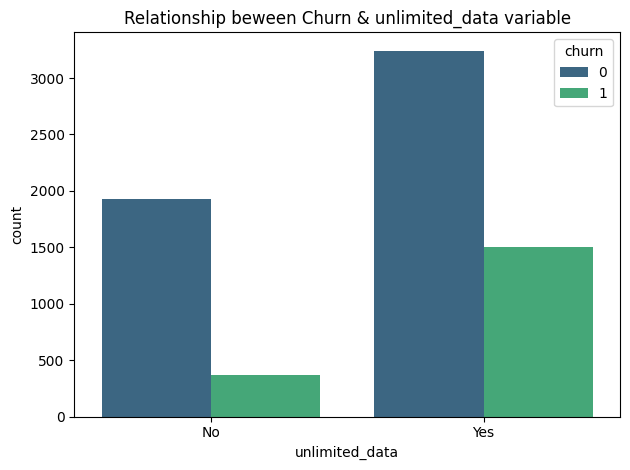

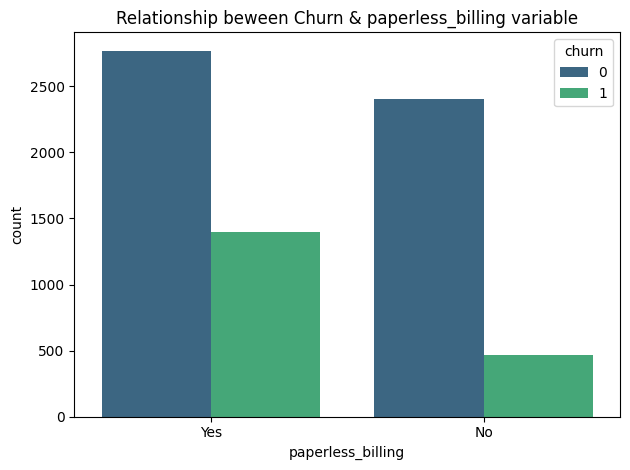

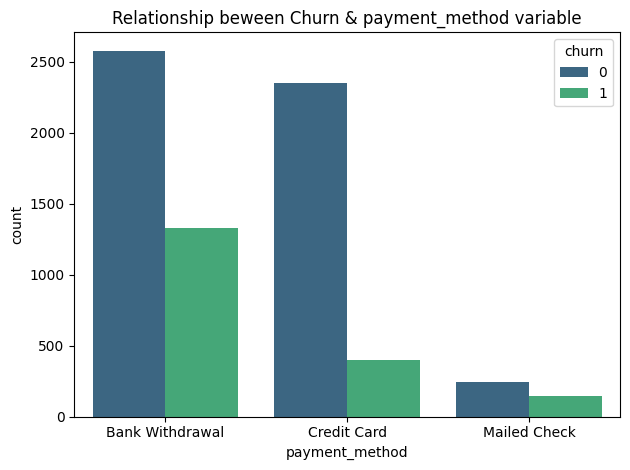

In [54]:
for i in binary_category_cols:
    sns.countplot(x = i, hue = 'churn', data = df_dropped, palette = 'viridis')
    plt.title('Relationship beween Churn & ' + i + ' variable')
    
    
    plt.tight_layout()
    plt.show()

These graphs tells us part of the story; it doesn't give the full picture. To get the full picture, we will need to get some hard numbers by delving deeper into the analysis.  
Before we go into our analyses of the variables wrt churn, we have to establish that our overall churn ration - 73% not churned, 27% churned - is our baseline for comparing the behavior of specific segments within this dataset.

**How does Gender affect Churn?**

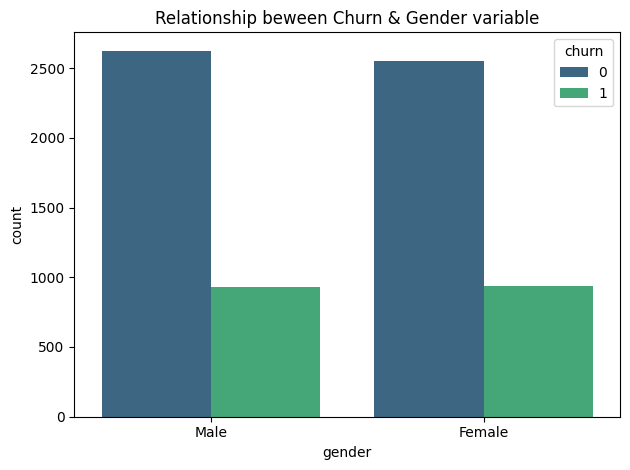

In [177]:
sns.countplot(x = 'gender', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Gender variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Gender variable.png', bbox_inches = 'tight')
plt.show()

In [56]:
df_gender_churn_grouped = df_dropped.groupby(['gender', 'churn']).size().unstack()
df_gender_churn_grouped

churn,0,1
gender,,
Female,2549,939
Male,2625,930


In [57]:
percentages_gender = df_gender_churn_grouped.div(df_gender_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_gender

churn,0,1
gender,,
Female,73.0,27.0
Male,74.0,26.0


The churn ratio for customers who are male and female both aligns closely with the overall churn ratio. This suggests that customers in both gender groups behave similarly to the average customer with respect to churn. Therefore, gender does not significantly affect churn behavior and might not be a strong predictor of churn on its own.  

**How does being below or above 30 affect customer churn?**

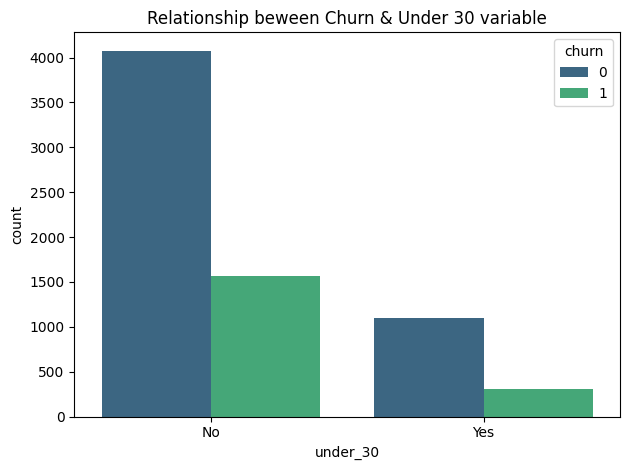

In [178]:
sns.countplot(x = 'under_30', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Under 30 variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Under 30 variable.png', bbox_inches = 'tight')
plt.show()

In [59]:
df_dropped.under_30.value_counts()

No     5642
Yes    1401
Name: under_30, dtype: int64

In this dataset, 1,401 customers are under 30 while 5,642 customers are older than 30 years of age.

In [60]:
df_u30_churn_grouped = df_dropped.groupby(['under_30', 'churn']).size().unstack()
df_u30_churn_grouped

churn,0,1
under_30,,
No,4077,1565
Yes,1097,304


In [61]:
percentages_u30 = df_u30_churn_grouped.div(df_u30_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_u30

churn,0,1
under_30,,
No,72.0,28.0
Yes,78.0,22.0


Just as we noticed for the gender analysis with respect to churn, the churn ratios in both groups here (under and above 30) are similar to the overall churn ratio of 73% and 27%. We cannot explicitly say this variable affects churn on its own.

**How does senior citizenry affect churn?**

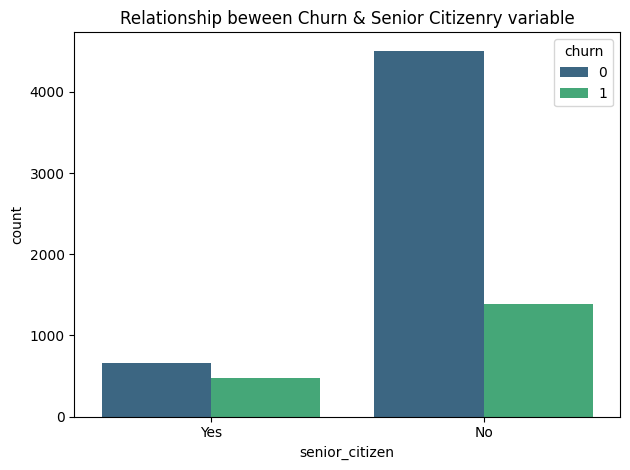

In [179]:
sns.countplot(x = 'senior_citizen', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Senior Citizenry variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Senior Citizenry variable.png', bbox_inches = 'tight')
plt.show()

In [63]:
df_snrcitz_churn_grouped = df_dropped.groupby(['senior_citizen', 'churn']).size().unstack()
df_snrcitz_churn_grouped

churn,0,1
senior_citizen,,
No,4508,1393
Yes,666,476


In [64]:
percentages_snrctz = df_snrcitz_churn_grouped.div(df_snrcitz_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_snrctz

churn,0,1
senior_citizen,,
No,76.0,24.0
Yes,58.0,42.0


- Non-Senior Citizens (74% not churned, 26% churned): The churn ratio for customers who are not senior citizens aligns closely with the overall churn ratio. This similarity suggests that the non-senior citizen group behaves similarly to the average customer with respect to churn. Therefore, being a non-senior citizen, in this case, does not significantly deviate from the expected churn behavior and might not be a strong predictor of churn on its own.  

- Senior Citizens (58% not churned, 42% churned): The churn ratio for senior citizens significantly differs from the overall churn ratio, with a much higher percentage of churn. This indicates that senior citizens as a group are more susceptible to churning compared to the average customer. The significant deviation from the overall churn rate suggests that senior citizen status might be an important factor or predictor of churn.

**Why do senior citizens churn?**

In the list of churn reasons, we have the reason 'deceased'. I want to rule this out as a reason why senior citizens churn to get the actual reason they churn.

In [65]:
snr_citizen_df = df_dropped.loc[df_dropped['senior_citizen'] == 'Yes']
snr_citizen_df

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1,91,Competitor,Competitor offered more data
5,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,Competitor,Competitor made better offer
6,4918-FYJNT,Female,68,No,Yes,Yes,No,0,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,4,55,None,Yes,22.74,Yes,Yes,Fiber Optic,21,No,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,90.45,5044.80,12.48,0,1250.70,6283.02,4,0,42,Not Churned,None
10,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,Competitor,Competitor made better offer
11,4854-CIDCF,Female,74,No,Yes,No,No,0,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,3,None,Yes,46.65,No,Yes,Fiber Optic,25,No,No,Yes,No,No,No,No,Yes,Two Year,No,Bank Withdrawal,73.85,196.40,0.00,0,139.95,336.35,4,0,74,Not Churned,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,7789-CRUVC,Female,77,No,Yes,Yes,No,0,United States,California,San Diego,92107,32.741852,-117.243453,27959,Q3,Yes,1,61,None,Yes,33.75,Yes,Yes,Fiber Optic,29,Yes,Yes,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,94.20,5895.45,0.00,0,2058.75,7954.20,3,0,76,Not Churned,None
3805,9972-VAFJJ,Female,77,No,Yes,Yes,No,0,United States,California,San Diego,92116,32.765299,-117.122565,33083,Q3,Yes,1,53,None,Yes,47.64,No,Yes,Fiber Optic,25,No,Yes,Yes,Yes,Yes,No,No,Yes,One Year,Yes,Bank Withdrawal,94.00,4871.45,0.00,0,2524.92,7396.37,3,0,73,Not Churned,None
3809,5981-ZVXOT,Female,72,No,Yes,No,No,0,United States,California,San Diego,92131,32.893250,-117.087091,29283,Q3,No,0,35,Offer C,Yes,10.73,Yes,Yes,Fiber Optic,3,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,108.35,3726.15,0.00,0,375.55,4101.70,3,0,50,Not Churned,None
3814,2274-XUATA,Male,78,No,Yes,Yes,No,0,United States,California,Earp,92242,34.137742,-114.365140,1564,Q3,Yes,8,72,Offer A,No,0.00,No,Yes,Cable,26,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,63.10,4685.55,0.00,0,0.00,4685.55,3,0,56,Not Churned,None


In [66]:
df_snr_ctz_churn_reason = snr_citizen_df.churn_reason.value_counts().reset_index().rename(
    columns={'index':'reason for churn', 'churn_reason':'count'})
df_snr_ctz_churn_reason

,reason for churn,count
0,None,666
1,Competitor made better offer,90
2,Competitor had better devices,84
3,Attitude of support person,64
4,Competitor offered more data,27
5,Price too high,26
6,Don't know,26
7,Attitude of service provider,25
8,Product dissatisfaction,23
9,Network reliability,18


In [67]:
df_snr_ctz_churn_reason = df_snr_ctz_churn_reason[
    df_snr_ctz_churn_reason['reason for churn'] !='None'].reset_index(drop=True)
df_snr_ctz_churn_reason

,reason for churn,count
0,Competitor made better offer,90
1,Competitor had better devices,84
2,Attitude of support person,64
3,Competitor offered more data,27
4,Price too high,26
5,Don't know,26
6,Attitude of service provider,25
7,Product dissatisfaction,23
8,Network reliability,18
9,Service dissatisfaction,15


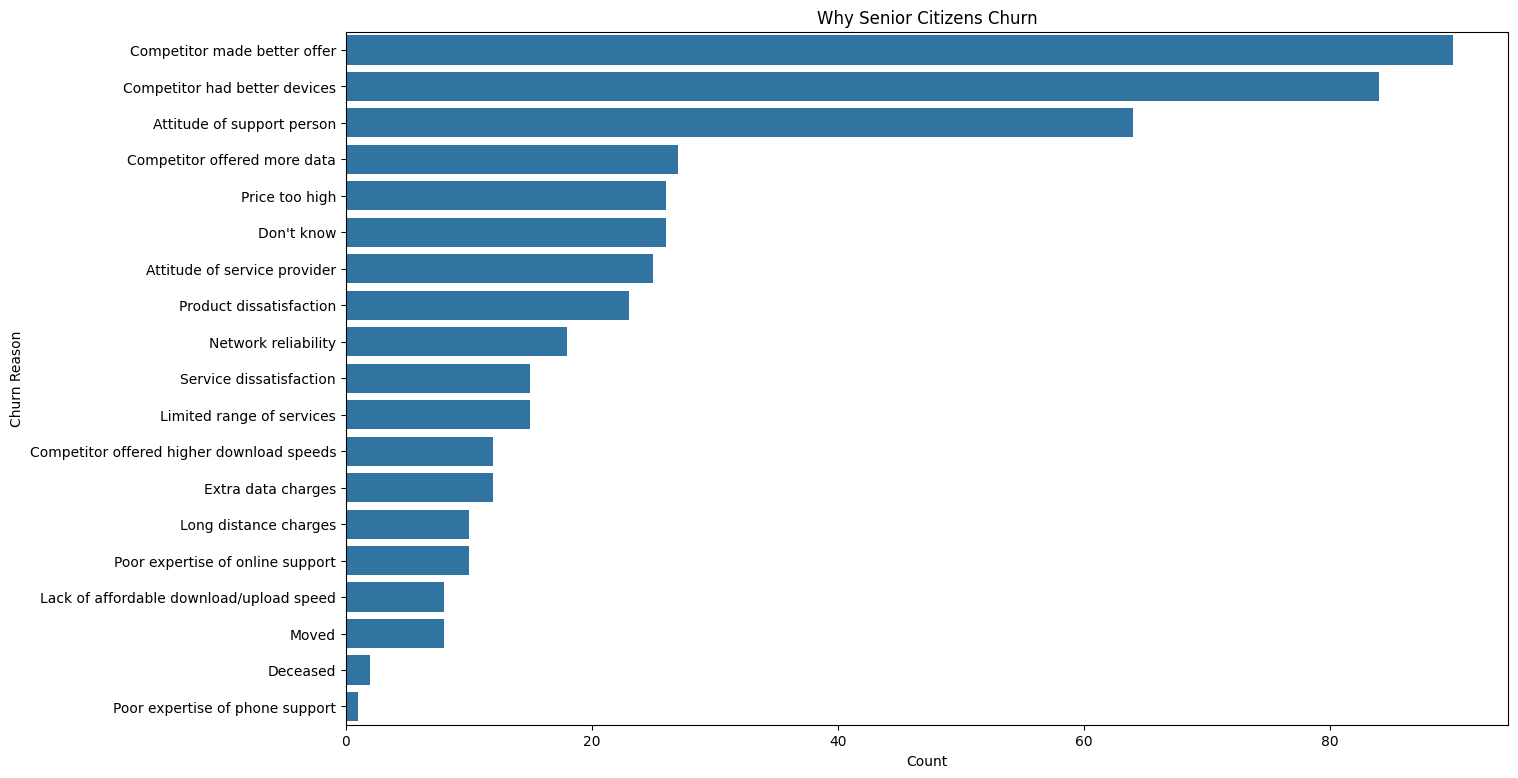

In [181]:
plt.figure(figsize = (15,9))
sns.barplot(data = df_snr_ctz_churn_reason, x = 'count', y = 'reason for churn')
plt.title('Why Senior Citizens Churn')
plt.ylabel('Churn Reason')
plt.xlabel('Count')

plt.savefig('Why Senior Citizens Churn.png', bbox_inches = 'tight')
plt.show()

From what we see here, the majority of the reasons why senior citizens churn is because of competitors, customer support attitude, and price.

**How does being married affect churn?**

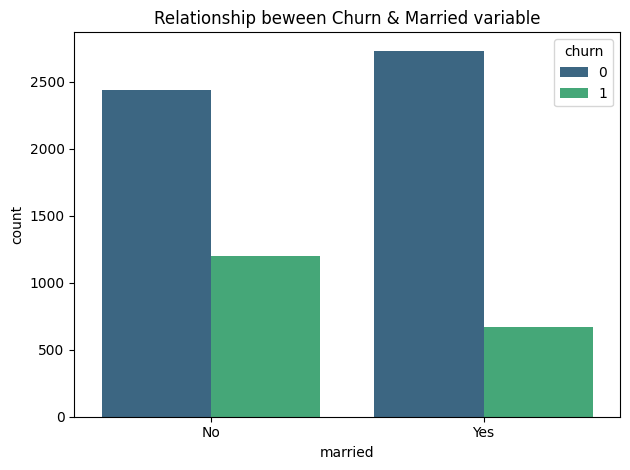

In [182]:
sns.countplot(x = 'married', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Married variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Married variable.png', bbox_inches = 'tight')
plt.show()

In [70]:
df_married_churn_grouped = df_dropped.groupby(['married', 'churn']).size().unstack()
df_married_churn_grouped

churn,0,1
married,,
No,2441,1200
Yes,2733,669


In [71]:
percentages_married = df_married_churn_grouped.div(df_married_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_married

churn,0,1
married,,
No,67.0,33.0
Yes,80.0,20.0


We see that the chrun ration for the married variable deviates significantly, in opposite directions, for both groups. Considering the overall churn ratio of 73% not churned and 27% chuned, we see that those that are not married tend to churn more (67% not churned, 33% churned) than those that are married (80% churned, 20% not churned). 

**How does having dependents affect churn?**

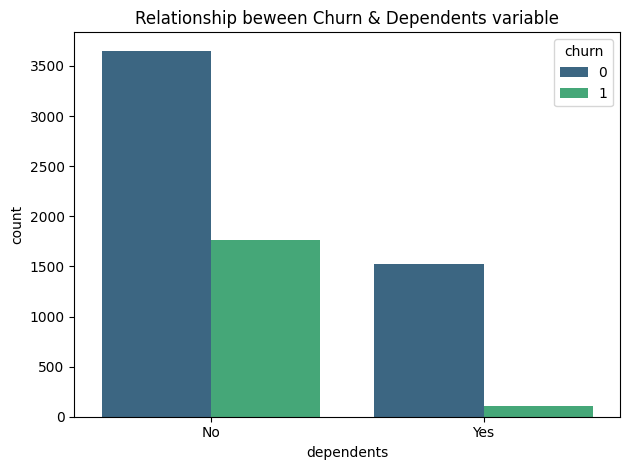

In [183]:
sns.countplot(x = 'dependents', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Dependents variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Dependents variable.png', bbox_inches = 'tight')
plt.show()

In [73]:
df_dependents_churn_grouped = df_dropped.groupby(['dependents', 'churn']).size().unstack()
df_dependents_churn_grouped

churn,0,1
dependents,,
No,3653,1763
Yes,1521,106


In [74]:
percentages_depdnts = df_dependents_churn_grouped.div(df_dependents_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_depdnts

churn,0,1
dependents,,
No,67.0,33.0
Yes,93.0,7.0


From this, we see that those that have dependents tend to even be more loyal as 93% of this group are retained while only 7% are churned. While for those without dependents, with a ratio of 67% not churned; 33% churned, are slightly more suceptible to churning. 

**How does doing referrals affect churn?**

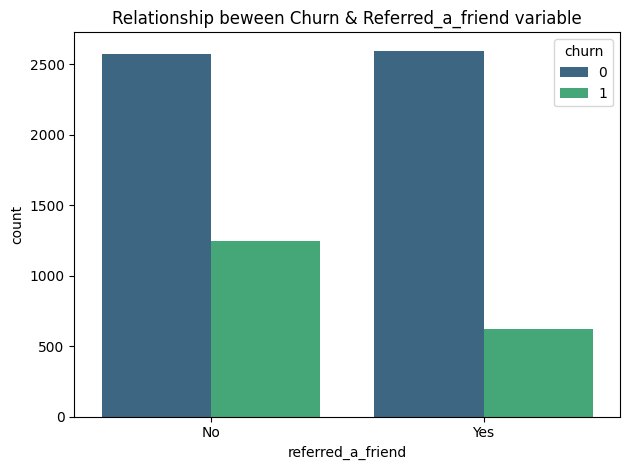

In [184]:
sns.countplot(x = 'referred_a_friend', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Referred_a_friend variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Referred_a_friend variable.png', bbox_inches = 'tight')
plt.show()

In [76]:
df_referred_churn_grouped = df_dropped.groupby(['referred_a_friend', 'churn']).size().unstack()
df_referred_churn_grouped

churn,0,1
referred_a_friend,,
No,2576,1245
Yes,2598,624


In [77]:
percentages_ref = df_referred_churn_grouped.div(df_referred_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_ref

churn,0,1
referred_a_friend,,
No,67.0,33.0
Yes,81.0,19.0


As expected, those who refer a friend tend to be more loyal than those that did not refer a friend (considering the churn ratio baseline of 73% to 27%)

**How does having phone service affect churn?**

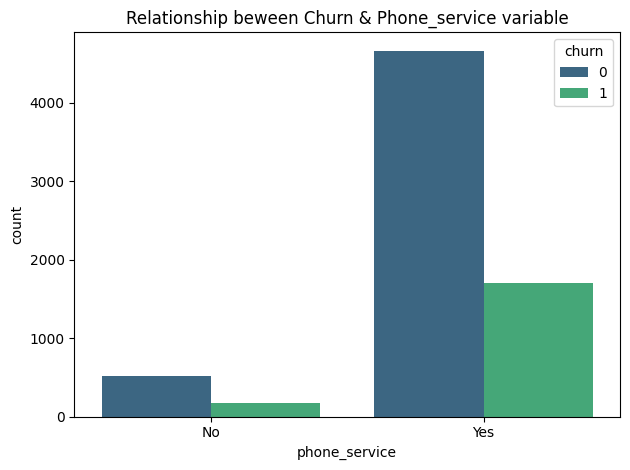

In [185]:
sns.countplot(x = 'phone_service', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Phone_service variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Phone_service variable.png', bbox_inches = 'tight')
plt.show()

In [79]:
df_phoneserv_churn_grouped = df_dropped.groupby(['phone_service', 'churn']).size().unstack()
df_phoneserv_churn_grouped

churn,0,1
phone_service,,
No,512,170
Yes,4662,1699


A lot more people who have phone service use this company's telecom service

In [80]:
percentages_phserv = df_phoneserv_churn_grouped.div(df_phoneserv_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_phserv

churn,0,1
phone_service,,
No,75.0,25.0
Yes,73.0,27.0


Both groups (i.e. customers that use phone service and those that do not) do not deviate from the churn ratio baseline (73% not churned; 27% churned) so we cannot say this feature significantly affects churn in any meaningful way on its own.

**How does having multiple lines affect churn?**

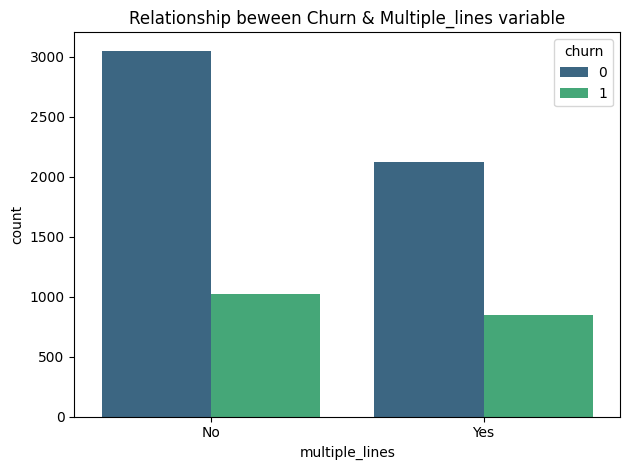

In [186]:
sns.countplot(x = 'multiple_lines', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Multiple_lines variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Multiple_lines variable.png', bbox_inches = 'tight')
plt.show()

In [82]:
df_multlines_churn_grouped = df_dropped.groupby(['multiple_lines', 'churn']).size().unstack()
df_multlines_churn_grouped

churn,0,1
multiple_lines,,
No,3053,1019
Yes,2121,850


In [83]:
percentages_multlines = df_multlines_churn_grouped.div(df_multlines_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_multlines

churn,0,1
multiple_lines,,
No,75.0,25.0
Yes,71.0,29.0


Having multiple lines or not does not significantly affect churn as the churn ratio of both groups do nt deviate significantly from the baseline churn ratio

**How does having internet service affect churn?**

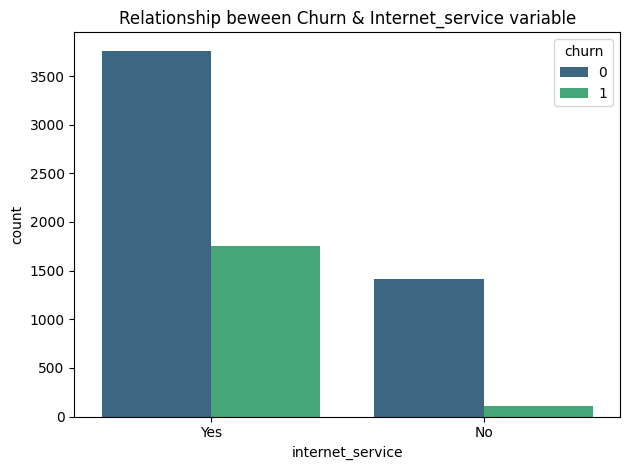

In [187]:
sns.countplot(x = 'internet_service', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Internet_service variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Internet_service variable.png', bbox_inches = 'tight')
plt.show()

In [85]:
df_intservice_churn_grouped = df_dropped.groupby(['internet_service', 'churn']).size().unstack()
df_intservice_churn_grouped

churn,0,1
internet_service,,
No,1413,113
Yes,3761,1756


In [86]:
percentages_intservice = df_intservice_churn_grouped.div(df_intservice_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_intservice

churn,0,1
internet_service,,
No,93.0,7.0
Yes,68.0,32.0


An interesting phenomenon develops here; those without internet service tend to be more loyal (93% not churned; 7% churned) than those with internet service (68% not churned; 32% churned). 

**How does having online security affect churn?**

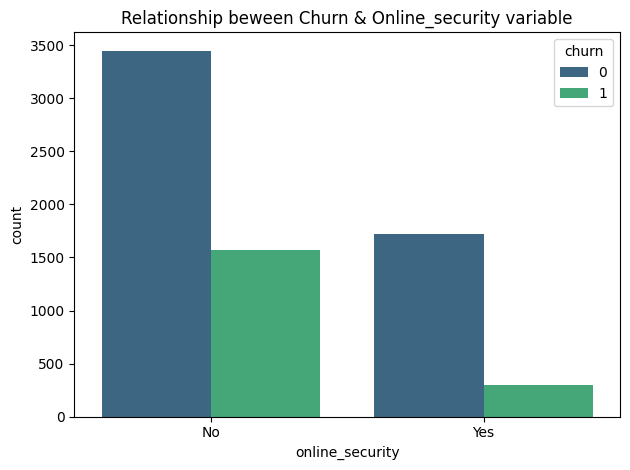

In [188]:
sns.countplot(x = 'online_security', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Online_security variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Online_security variable.png', bbox_inches = 'tight')
plt.show()

In [88]:
df_onlinesec_churn_grouped = df_dropped.groupby(['online_security', 'churn']).size().unstack()
df_onlinesec_churn_grouped

churn,0,1
online_security,,
No,3450,1574
Yes,1724,295


In [89]:
percentages_onlinesec = df_onlinesec_churn_grouped.div(df_onlinesec_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_onlinesec

churn,0,1
online_security,,
No,69.0,31.0
Yes,85.0,15.0


Those without online security tend to be churners than those with online security, although the deviation fro the baseline for the latter is not too wide. For those with online security on the other hand, tend to be very loyal. 

**How does having online backup affect churn?**

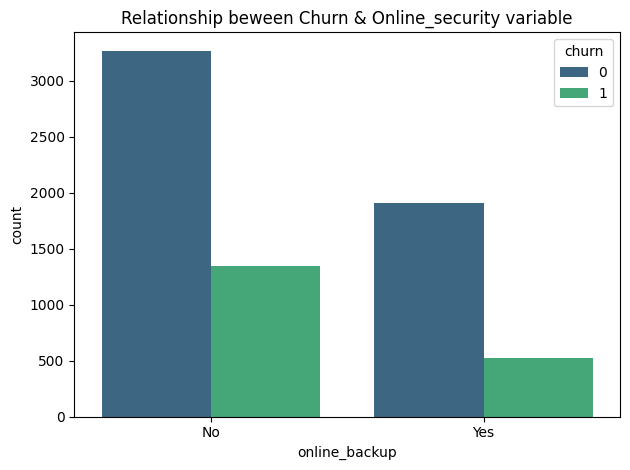

In [189]:
sns.countplot(x = 'online_backup', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Online_security variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Online_security variable.png', bbox_inches = 'tight')
plt.show()

In [91]:
df_onlinebckup_churn_grouped = df_dropped.groupby(['online_backup', 'churn']).size().unstack()
df_onlinebckup_churn_grouped

churn,0,1
online_backup,,
No,3268,1346
Yes,1906,523


In [92]:
percentages_onlinebckup = df_onlinebckup_churn_grouped.div(df_onlinebckup_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_onlinebckup

churn,0,1
online_backup,,
No,71.0,29.0
Yes,78.0,22.0


Considering the churn ratio reference point of 73% churned and 27% not churned, the first group in this analysis does not deviate too much from the reference point. The second group however (i.e. those that have online backup) deviates slightly more in favor of the non churners. In essence, those with online backup tend to be more loyal (less churned) than those without.

**How does having device protection plan affect churn?**

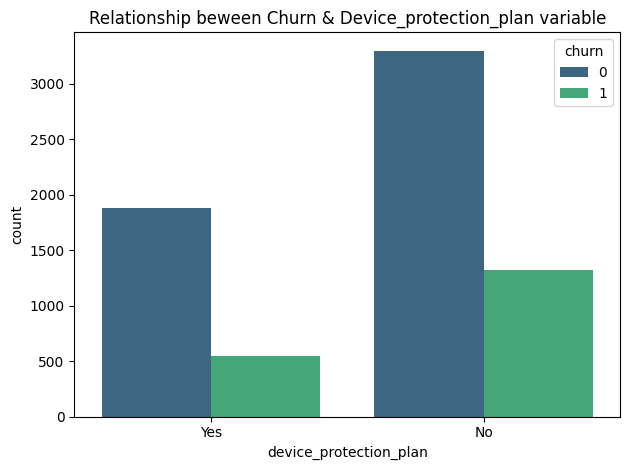

In [190]:
sns.countplot(x = 'device_protection_plan', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Device_protection_plan variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Device_protection_plan variable.png', bbox_inches = 'tight')
plt.show()

In [94]:
df_devprotecpln_churn_grouped = df_dropped.groupby(['device_protection_plan', 'churn']).size().unstack()
df_devprotecpln_churn_grouped

churn,0,1
device_protection_plan,,
No,3297,1324
Yes,1877,545


In [95]:
percentages_devprotecpln = df_devprotecpln_churn_grouped.div(df_devprotecpln_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_devprotecpln

churn,0,1
device_protection_plan,,
No,71.0,29.0
Yes,77.0,23.0


From this, we see that those with device protection plan are slightly more less likely to churn than those without

**How does having premium tech support affect churn?**

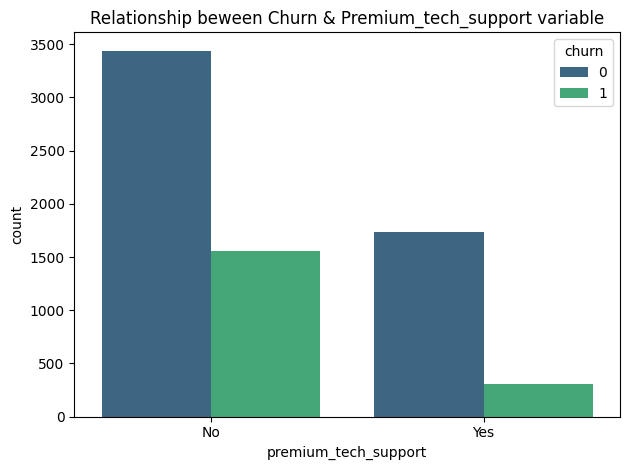

In [191]:
sns.countplot(x = 'premium_tech_support', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Premium_tech_support variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Premium_tech_support variable.png', bbox_inches = 'tight')
plt.show()

In [97]:
df_premtechsupport_churn_grouped = df_dropped.groupby(['premium_tech_support', 'churn']).size().unstack()
df_premtechsupport_churn_grouped

churn,0,1
premium_tech_support,,
No,3440,1559
Yes,1734,310


In [98]:
percentages_premtechsupport = df_premtechsupport_churn_grouped.div(df_premtechsupport_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_premtechsupport

churn,0,1
premium_tech_support,,
No,69.0,31.0
Yes,85.0,15.0


Deviation from the baseline goes in opposite direction for both groups. Customers without premium tech support tend to be churners while those with premium tech support are more loyal.

**How does streaming movies affect churn?**

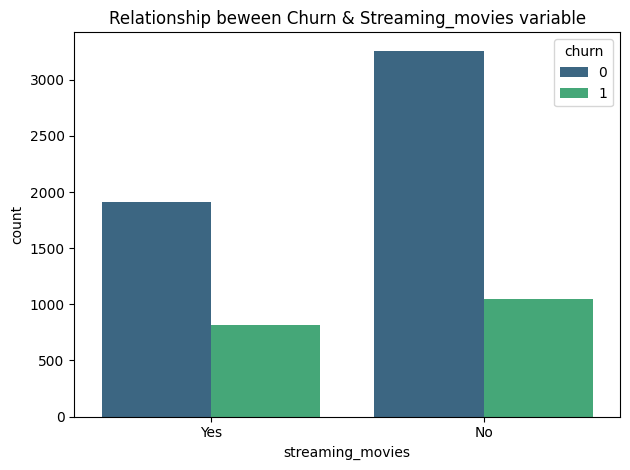

In [192]:
sns.countplot(x = 'streaming_movies', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Streaming_movies variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Streaming_movies variable.png', bbox_inches = 'tight')
plt.show()

In [100]:
df_strmmovies_churn_grouped = df_dropped.groupby(['streaming_movies', 'churn']).size().unstack()
df_strmmovies_churn_grouped

churn,0,1
streaming_movies,,
No,3260,1051
Yes,1914,818


In [101]:
percentages_strmmovies = df_strmmovies_churn_grouped.div(df_strmmovies_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_strmmovies

churn,0,1
streaming_movies,,
No,76.0,24.0
Yes,70.0,30.0


The streaming_movies variable on its own does not give us sufficient insights into customer churn behaviour as both groups in this category do not deviate significantly from the baseline. However, those that stream tv are more likely to churn than those who do not.  

**How does streaming tv affect churn?**

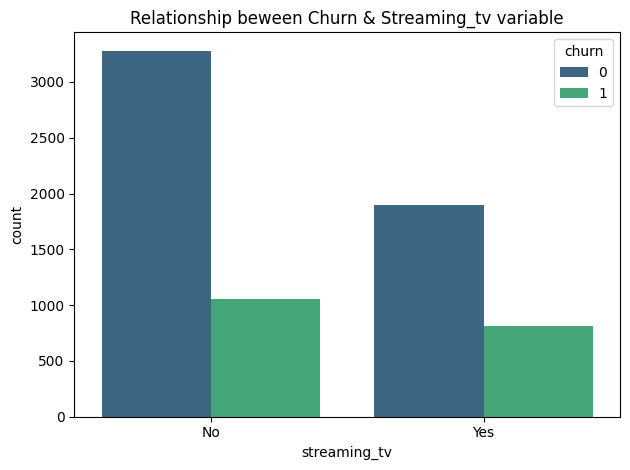

In [193]:
sns.countplot(x = 'streaming_tv', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Streaming_tv variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Streaming_tv variable.png', bbox_inches = 'tight')
plt.show()

In [103]:
df_strmtv_churn_grouped = df_dropped.groupby(['streaming_tv', 'churn']).size().unstack()
df_strmtv_churn_grouped

churn,0,1
streaming_tv,,
No,3281,1055
Yes,1893,814


In [104]:
percentages_strmtv = df_strmtv_churn_grouped.div(df_strmtv_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_strmtv

churn,0,1
streaming_tv,,
No,76.0,24.0
Yes,70.0,30.0


Just like the streaming_movies variable, the streaming_tv feature on its own does not give sufficient insights into customer churn behaviour. And like the streaming_movies feature, customers that stream movies are likely to be churners than customers that do not.

**How does streaming music affect churn?**

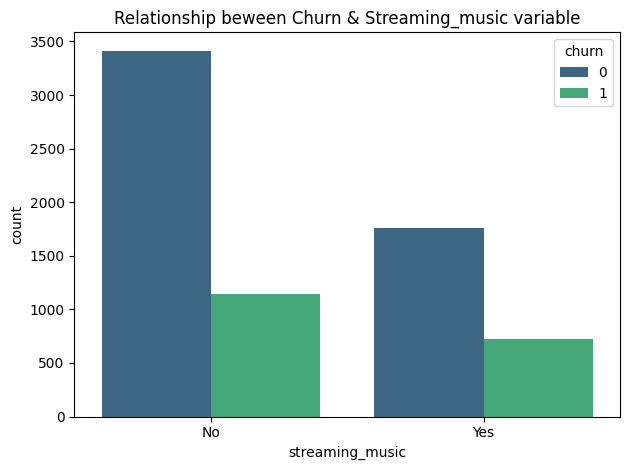

In [194]:
sns.countplot(x = 'streaming_music', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Streaming_music variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Streaming_music variable.png', bbox_inches = 'tight')
plt.show()

In [106]:
df_strmmusic_churn_grouped = df_dropped.groupby(['streaming_music', 'churn']).size().unstack()
df_strmmusic_churn_grouped

churn,0,1
streaming_music,,
No,3414,1141
Yes,1760,728


In [107]:
percentages_strmmusic = df_strmmusic_churn_grouped.div(df_strmmusic_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_strmmusic

churn,0,1
streaming_music,,
No,75.0,25.0
Yes,71.0,29.0


The streaming_music variable follows similar pattern as the streaming_movies and streaming_tv variables

**How does having unlimited data affect churn?**

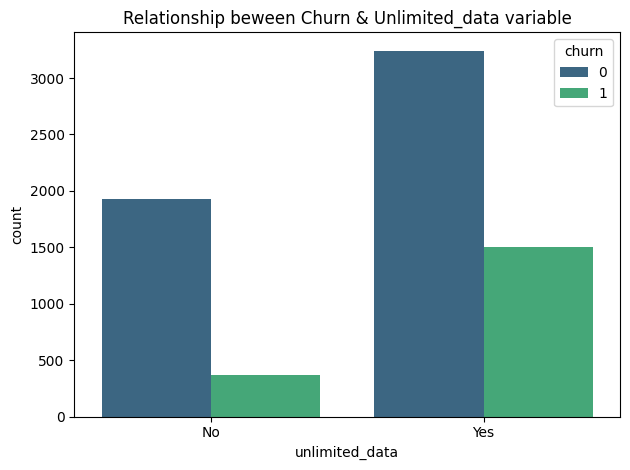

In [195]:
sns.countplot(x = 'unlimited_data', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Unlimited_data variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Unlimited_data variable.png', bbox_inches = 'tight')
plt.show()

In [109]:
df_unlimitddata_churn_grouped = df_dropped.groupby(['unlimited_data', 'churn']).size().unstack()
df_unlimitddata_churn_grouped

churn,0,1
unlimited_data,,
No,1931,367
Yes,3243,1502


In [110]:
percentages_unlimitddata = df_unlimitddata_churn_grouped.div(df_unlimitddata_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_unlimitddata

churn,0,1
unlimited_data,,
No,84.0,16.0
Yes,68.0,32.0


Looking at the percentages of both groups we see that they both deviate from the baseline significantly. Interestingly, customers who have unlimited data tend to be more churners than customers who do not have unlimited data. This could correspond to the 'have phone service' feature because in that case, customers who had phone service were the churners over those who did not. And it is the customers that have phone service that have higher chances of having unlimited data (or better still, being on the unlimited data plan service).

**How does using paperless billing affect churn?**

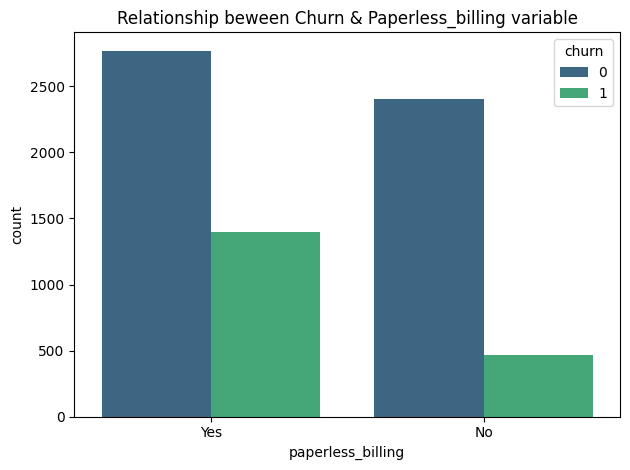

In [196]:
sns.countplot(x = 'paperless_billing', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Paperless_billing variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Paperless_billing variable.png', bbox_inches = 'tight')
plt.show()

In [112]:
df_paplessbill_churn_grouped = df_dropped.groupby(['paperless_billing', 'churn']).size().unstack()
df_paplessbill_churn_grouped

churn,0,1
paperless_billing,,
No,2403,469
Yes,2771,1400


In [113]:
percentages_paplessbill = df_paplessbill_churn_grouped.div(df_paplessbill_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_paplessbill

churn,0,1
paperless_billing,,
No,84.0,16.0
Yes,66.0,34.0


Customer who use paperless billing are likely to be churners than those who do not use paperless billing.

**How does payment method affect churn?**

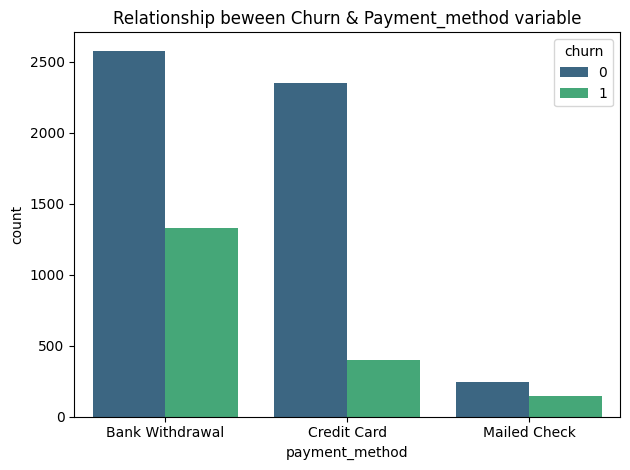

In [197]:
sns.countplot(x = 'payment_method', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Payment_method variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Payment_method variable.png', bbox_inches = 'tight')
plt.show()

In [115]:
df_pymntmthd_churn_grouped = df_dropped.groupby(['payment_method', 'churn']).size().unstack()
df_pymntmthd_churn_grouped

churn,0,1
payment_method,,
Bank Withdrawal,2580,1329
Credit Card,2351,398
Mailed Check,243,142


In [116]:
df_dropped['payment_method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: payment_method, dtype: int64

Most of the customers of this telecom company use bank withdrawal payment method.

In [117]:
percentages_pymntmthd = df_pymntmthd_churn_grouped.div(df_pymntmthd_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_pymntmthd

churn,0,1
payment_method,,
Bank Withdrawal,66.0,34.0
Credit Card,86.0,14.0
Mailed Check,63.0,37.0


Of all the customer that use diverse payment methods, those that use their credit cards are more loyal than the rest. While those that use mailed checks are more likely to churn.

**How does internet type affect churn?**

In [118]:
df_dropped.internet_type.unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

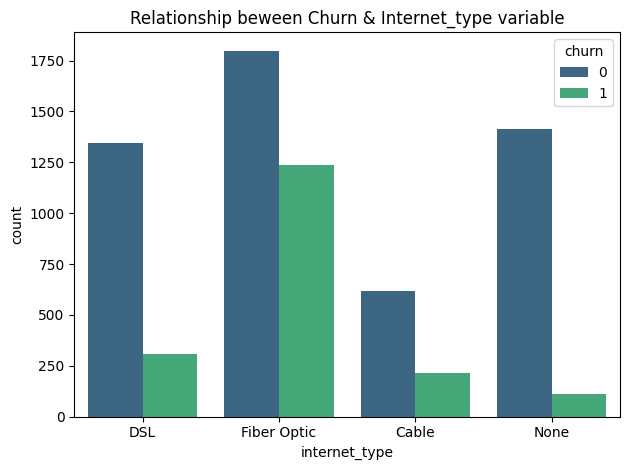

In [198]:
sns.countplot(x = 'internet_type', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Internet_type variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Internet_type variable.png', bbox_inches = 'tight')
plt.show()

In [120]:
df_dropped.internet_type.value_counts()

Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: internet_type, dtype: int64

Most customers are fiber optic users, while the least number of customers use cable.

In [121]:
df_inttype_churn_grouped = df_dropped.groupby(['internet_type', 'churn']).size().unstack()
df_inttype_churn_grouped

churn,0,1
internet_type,,
Cable,617,213
DSL,1345,307
Fiber Optic,1799,1236
None,1413,113


In [122]:
percentages_inttype = df_inttype_churn_grouped.div(df_inttype_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_inttype

churn,0,1
internet_type,,
Cable,74.0,26.0
DSL,81.0,19.0
Fiber Optic,59.0,41.0
None,93.0,7.0


41% of customers that use fiber optic internet are churners. This is several magnitudes higher than the baseline. Customers that do not use any internet type are leaset likely to churn. Those that use cable do not deviate significantly from the baseline and lastly, those that use DSL are also loyal and least likely to churn.

**How does country/state affect churn?**

In [123]:
df_dropped.country.unique()

array(['United States'], dtype=object)

In [124]:
df_dropped.state.unique()

array(['California'], dtype=object)

No point in analysing these variables wrt churn since there's only one value

**How does city affect churn?**

In [125]:
df_dropped.city.unique()

array(['Los Angeles', 'Inglewood', 'Whittier', ..., 'Topaz', 'Jacumba',
       'Holtville'], dtype=object)

In [126]:
df_dropped.city.nunique()

1106

In [127]:
df_dropped.city.value_counts().reset_index()

,index,city
0,Los Angeles,293
1,San Diego,285
2,San Jose,112
3,Sacramento,108
4,San Francisco,104
...,...,...
1101,Jacumba,2
1102,South Lake Tahoe,2
1103,Johannesburg,2
1104,Eldridge,2


In [128]:
# top 5 cities where customers churn
df_churned_city = df_dropped.loc[df_dropped['churn']==1].groupby(
    'city')['churn'].size().reset_index().sort_values(by = 'churn', ascending = False).head()
df_churned_city

,city,churn
597,San Diego,185
390,Los Angeles,78
600,San Francisco,31
604,San Jose,29
230,Fallbrook,26


In [129]:
# top 5 cities where customers do not churn
df_notchurned_city = df_dropped.loc[df_dropped['churn']==0].groupby(
    'city')['churn'].size().reset_index().sort_values(by = 'churn', ascending = False).head()

df_notchurned_city = df_notchurned_city.rename(columns={'churn': 'not_churn'})
df_notchurned_city

,city,not_churn
551,Los Angeles,215
850,San Diego,100
859,San Jose,83
836,Sacramento,82
853,San Francisco,73


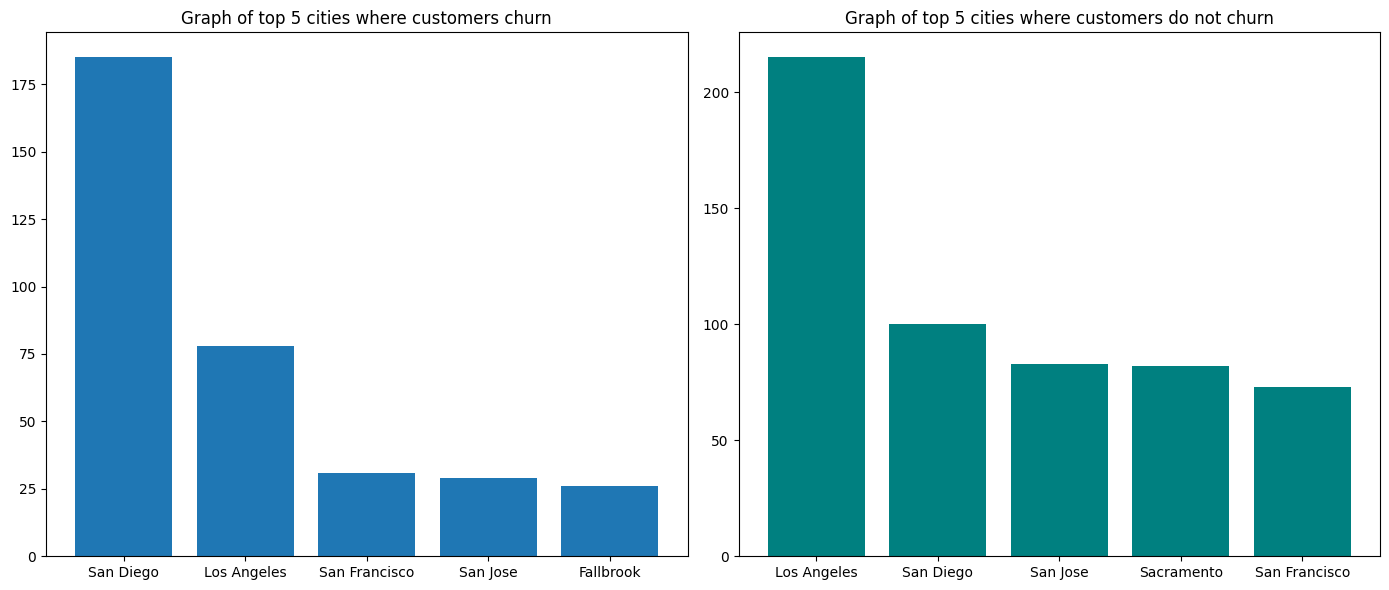

In [199]:
Fig, Axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

Axes[0].bar(df_churned_city.city,df_churned_city.churn)
Axes[0].set_title('Graph of top 5 cities where customers churn')
Axes[1].bar(df_notchurned_city.city, df_notchurned_city.not_churn, color = 'Teal')
Axes[1].set_title('Graph of top 5 cities where customers do not churn')
   
    
plt.tight_layout()
plt.savefig('Graph of top 5 cities where customers Churn and where they do not churn.png', bbox_inches = 'tight')
plt.show()

In [131]:
df_dropped.loc[df_dropped['churn']==1].groupby('city')['churn'].size().sort_values(ascending = False).head(10)

city
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Fallbrook         26
Sacramento        26
Temecula          22
Escondido         16
Long Beach        15
Oakland           13
Name: churn, dtype: int64

In [132]:
df_dropped.city.value_counts().head(20)

Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Escondido         51
Stockton          44
Fallbrook         43
Glendale          40
Bakersfield       39
Temecula          38
Riverside         32
Berkeley          32
Whittier          30
Pasadena          30
Irvine            28
Anaheim           28
Name: city, dtype: int64

Regarding the top 5 cities where customers churn, we have the following metric:  
- About 185 out of 285 customers churn in San Diego. That is a churn ratio of 35% : 65% in favor of the churners. Way above the baseline chrun ratio of 73% not churned; 27% churned.  
- In Los Angeles, 78 customers churn out of 293 total customers. which gives us a churn ratio of 73% not churned; 27% churned, which is the same as the overall baseline churn ratio.  
- For San Francisco, we have 31 churners out of 104 customers, which amounts to 30% churned customers. This is slightly higher than our overall churner percentage but not a huge deviation.  
- In San Jose, we have a churn ratio of 74% not churned and 26% churned.  
- Lastly, 60% of the customers in Fallbrook are churners.

**How does offer affect churn?**

In [133]:
df_dropped.offer.unique()

array(['None', 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

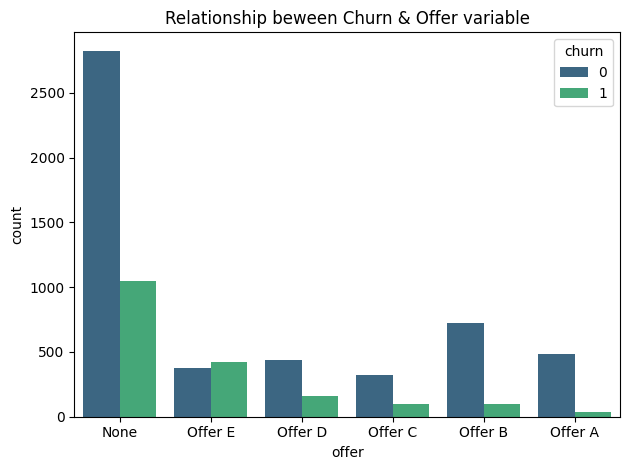

In [200]:
sns.countplot(x = 'offer', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Offer variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Offer variable.png', bbox_inches = 'tight')
plt.show()

In [135]:
df_dropped.offer.value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: offer, dtype: int64

Most customers that were given an offer were given offers B and E

In [136]:
df_offer_churn_grouped = df_dropped.groupby(['offer', 'churn']).size().unstack()
df_offer_churn_grouped

churn,0,1
offer,,
None,2826,1051
Offer A,485,35
Offer B,723,101
Offer C,320,95
Offer D,441,161
Offer E,379,426


In [137]:
percentages_offer = df_offer_churn_grouped.div(df_offer_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_offer

churn,0,1
offer,,
None,73.0,27.0
Offer A,93.0,7.0
Offer B,88.0,12.0
Offer C,77.0,23.0
Offer D,73.0,27.0
Offer E,47.0,53.0


This variable represents the last marketing offer that the customer accepted. Of all the categories in this group, customers that accepted Offer E are the most likely to churn. While those that accepted offer A are the most loyal. The other groups are fairly consistent with the overall churn ratio of 73% not churned; 27% churned.

**How does contract affect churn?**

In [138]:
df_dropped.contract.unique()

array(['Month-to-Month', 'Two Year', 'One Year'], dtype=object)

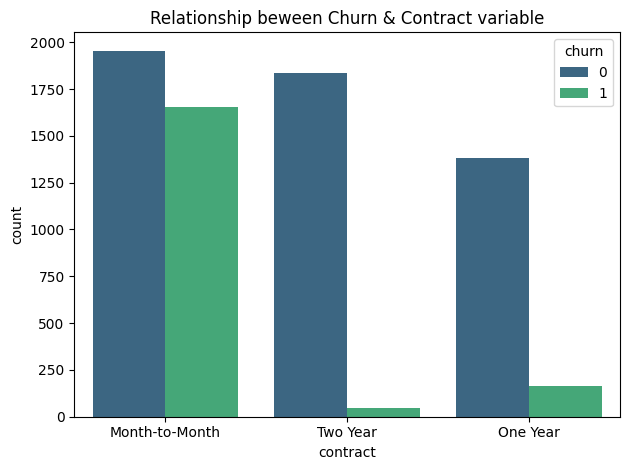

In [201]:
sns.countplot(x = 'contract', hue = 'churn', data = df_dropped, palette = 'viridis')
plt.title('Relationship beween Churn & Contract variable')
    
    
plt.tight_layout()
plt.savefig('Relationship beween Churn & Contract variable.png', bbox_inches = 'tight')
plt.show()

In [140]:
df_dropped.contract.value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: contract, dtype: int64

Over half of the customers of this telecom company are month-to-month subscribers. 

In [141]:
df_contract_churn_grouped = df_dropped.groupby(['contract', 'churn']).size().unstack()
df_contract_churn_grouped

churn,0,1
contract,,
Month-to-Month,1955,1655
One Year,1384,166
Two Year,1835,48


In [142]:
percentages_contract = df_contract_churn_grouped.div(df_contract_churn_grouped.sum(axis=1), axis=0).round(2) * 100

percentages_contract

churn,0,1
contract,,
Month-to-Month,54.0,46.0
One Year,89.0,11.0
Two Year,97.0,3.0


As the duration of contract increases, the loyalty of the customers increases. Month-to-month subscribers are very likely to churn. 

In [143]:
df_dropped.head()

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,1,91,Competitor,Competitor offered more data
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,0,42,Not Churned,None
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,0,34,Not Churned,None
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,0,46,Not Churned,None
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,34.02381,-118.156582,68701,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,0,38,Not Churned,None


**Relationship between Age and Churn**

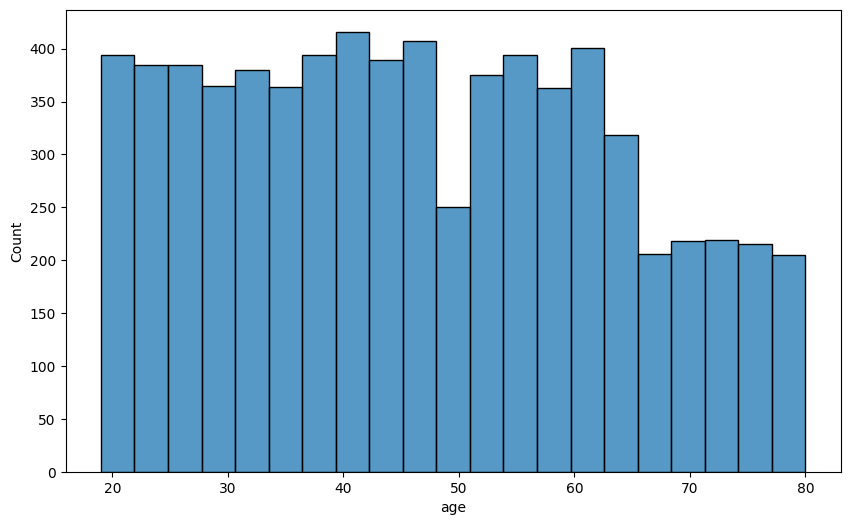

In [163]:
plt.figure(figsize = (10,6))
sns.histplot(df_dropped['age'])
plt.show()

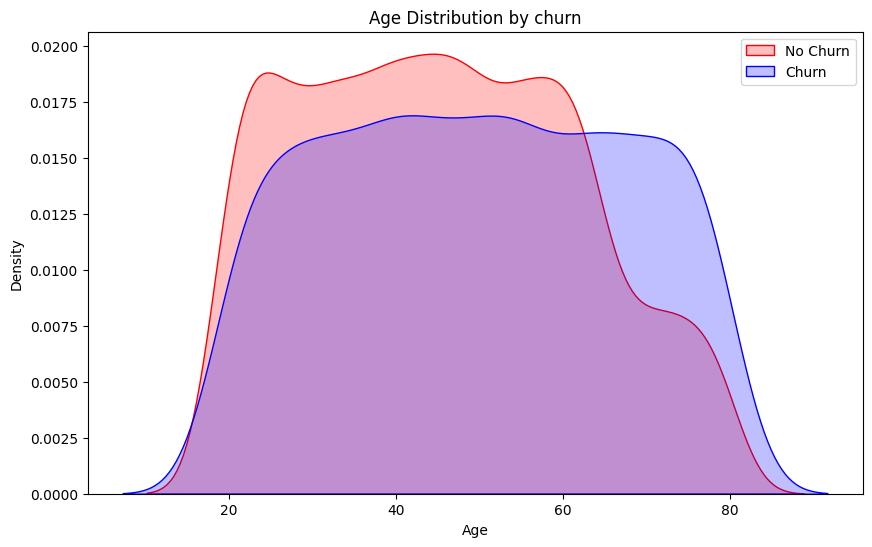

In [164]:
plt.figure(figsize = (10,6))
Fig = sns.kdeplot(df_dropped.age[(df_dropped['churn'] == 0) ],
                color="Red", shade = True)
Fig = sns.kdeplot(df_dropped.age[(df_dropped['churn'] == 1) ],
                ax =Fig, color="Blue", shade= True)
Fig.legend(["No Churn","Churn"],loc='upper right')
Fig.set_ylabel('Density')
Fig.set_xlabel('Age')
Fig.set_title('Age Distribution by churn')
plt.show()

There is no set trend in the churn behaviour across age distributions.

**Relationship between monthly charges and churn**

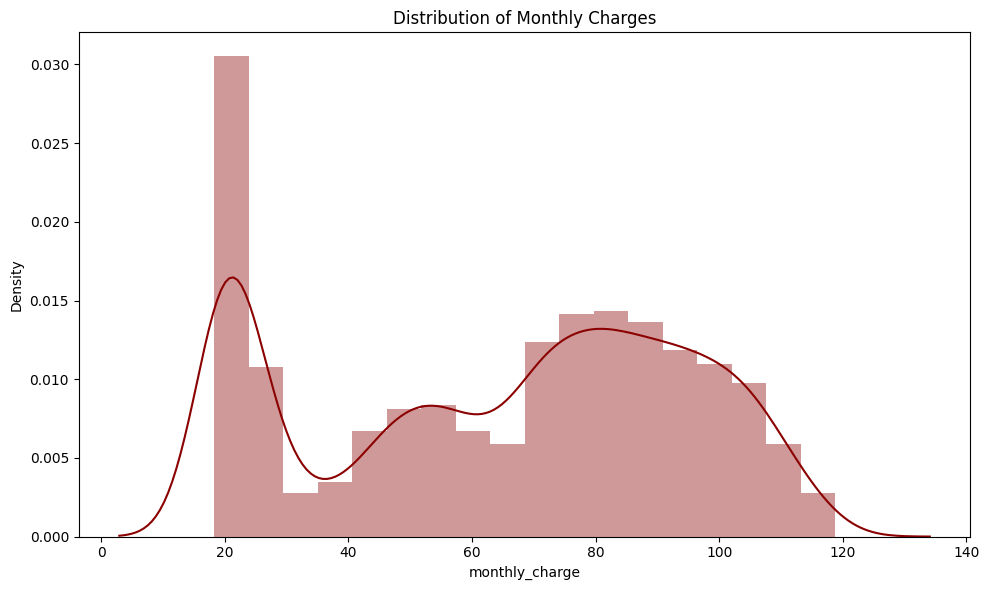

In [203]:
plt.figure(figsize = (10,6))
sns.distplot(df_dropped['monthly_charge'], color = "darkred")
plt.title('Distribution of Monthly Charges')

plt.tight_layout()
plt.savefig('Distribution of Monthly Charges.png', bbox_inches = 'tight')
plt.show()

The distribution of the monthly_charge variable is multimodal with most customers paying $20 for this telecom service. There are other 'peaks' in this distribution albeit they are more broad. All these suggests the business could be offering different price tiers for their service.  

Although I suspect that this graph takes into account 'monthly' charges of customers on one-year and two-year contracts. So we might have a situation where there are indeed tiered monthly prices which are captured by this graph and also monthly prices of annual and bi-annual contracts which are also captured by this graph. We could investigate this further to be sure we interprete further analyses correctly.

In [146]:
df_dropped.contract.unique()

array(['Month-to-Month', 'Two Year', 'One Year'], dtype=object)

In [147]:
df_dropped.loc[(df_dropped['contract'] == 'One Year') | (df_dropped['contract'] == 'Two Year')]

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.00,0,3063.60,8080.25,3,0,42,Not Churned,None
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.00,0,0.00,3708.40,3,0,46,Not Churned,None
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88,3,0,38,Not Churned,None
6,4918-FYJNT,Female,68,No,Yes,Yes,No,0,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,4,55,None,Yes,22.74,Yes,Yes,Fiber Optic,21,No,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,90.45,5044.80,12.48,0,1250.70,6283.02,4,0,42,Not Churned,None
8,0052-DCKON,Male,28,Yes,No,Yes,No,0,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,9,66,None,Yes,43.77,Yes,Yes,Fiber Optic,41,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Bank Withdrawal,115.80,7942.15,0.00,0,2888.82,10830.97,3,0,42,Not Churned,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,4006-HKYHO,Male,24,Yes,No,No,No,0,United States,California,Bakersfield,93311,35.162070,-119.194488,20440,Q3,No,0,63,None,Yes,29.58,No,Yes,DSL,47,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,86.70,5309.50,0.00,0,1863.54,7173.04,3,0,74,Not Churned,None
7033,5647-URDKA,Male,27,Yes,No,Yes,Yes,1,United States,California,Alturas,96101,41.468877,-120.542290,5096,Q3,Yes,8,8,None,Yes,11.57,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,19.70,130.25,0.00,0,92.56,222.81,4,0,29,Not Churned,None
7035,4973-MGTON,Female,33,No,No,Yes,No,0,United States,California,Topaz,96133,38.636052,-119.489162,116,Q3,No,0,71,None,Yes,3.09,No,Yes,DSL,26,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,84.40,5969.30,0.00,0,219.39,6188.69,5,0,21,Not Churned,None
7036,5702-KVQRD,Male,34,No,No,Yes,No,0,United States,California,Topaz,96133,38.636052,-119.489162,116,Q3,Yes,2,71,Offer A,Yes,28.21,No,Yes,DSL,19,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,82.55,5832.65,0.00,0,2002.91,7835.56,3,0,68,Not Churned,None


Eyeballing this dataframe, given the conditions (i.e. customers on One Year and Two Year contracts) we already see high monthly charges. We can get the average here, lowest, and higest values to be sure.

In [148]:
print ('Average monthly charge of annual and bi-annual customers: ', df_dropped.loc[(df_dropped['contract'] == 'One Year') | (df_dropped['contract'] == 'Two Year')]['monthly_charge'].mean())
print ('Lowest monthly charge of annual and bi-annual customers: ', df_dropped.loc[(df_dropped['contract'] == 'One Year') | (df_dropped['contract'] == 'Two Year')]['monthly_charge'].min())
print ('Highest monthly charge of annual and bi-annual customers: ', df_dropped.loc[(df_dropped['contract'] == 'One Year') | (df_dropped['contract'] == 'Two Year')]['monthly_charge'].max())

Average monthly charge of annual and bi-annual customers:  63.894683949897825
Lowest monthly charge of annual and bi-annual customers:  18.25
Highest monthly charge of annual and bi-annual customers:  118.75


In [149]:
df_dropped.loc[(df_dropped['contract'] == 'Month-to-Month')]

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1,91,Competitor,Competitor offered more data
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.00,0,7.11,82.66,5,0,34,Not Churned,None
5,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,Competitor,Competitor made better offer
7,3891-PUQOD,Female,40,No,No,No,Yes,3,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,No,0,1,None,Yes,13.58,No,Yes,DSL,24,No,No,Yes,No,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,59.20,59.20,0.00,0,13.58,72.78,1,1,65,Dissatisfaction,Service dissatisfaction
10,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,Competitor,Competitor made better offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,8148-BPLZQ,Male,34,No,No,No,No,0,United States,California,Jacumba,91934,32.649787,-116.223700,699,Q3,No,0,34,None,Yes,4.89,No,Yes,Cable,27,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,49.80,1734.20,0.00,70,166.26,1970.46,4,0,47,Not Churned,None
7038,9108-EJFJP,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,32.649787,-116.223700,699,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.00,0,16.06,69.61,4,0,62,Not Churned,None
7040,9547-ITEFG,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,32.741859,-117.090353,73006,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.00,0,210.78,1108.53,5,0,32,Not Churned,None
7041,4993-JCRGJ,Male,62,No,No,No,No,0,United States,California,Holtville,92250,32.811001,-115.152865,8062,Q3,No,0,26,None,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.00,0,979.94,3261.54,5,0,66,Not Churned,None


In [150]:
print ('Average monthly charge of month-to-month customers: ', df_dropped.loc[(df_dropped['contract'] == 'Month-to-Month')]['monthly_charge'].mean())
print ('Lowest monthly charge of month-to-month customers: ', df_dropped.loc[(df_dropped['contract'] == 'Month-to-Month')]['monthly_charge'].min())
print ('Highest monthly charge of month-to-month customers: ', df_dropped.loc[(df_dropped['contract'] == 'Month-to-Month')]['monthly_charge'].max())

Average monthly charge of month-to-month customers:  65.58619113573387
Lowest monthly charge of month-to-month customers:  18.75
Highest monthly charge of month-to-month customers:  117.45


From this analysis we see that month-to-month customers pay as high as \\$117.45 per month and as low as \\$18.75. These values are similar to how much annual and bi-annual customers pay; as high as \\$118.75 and as low as \\$18.25 per month. This confirms our suspicion that there are indeed tiered month-month pricing plans that go all the up to \\$117 per month as well as annual and bi-annual plans that averages monthly charges of up to \\$118. All of which will be captured by our monthly_charges distribution.  

Now that we have this understanding, we can now analyze monthy charges by churn

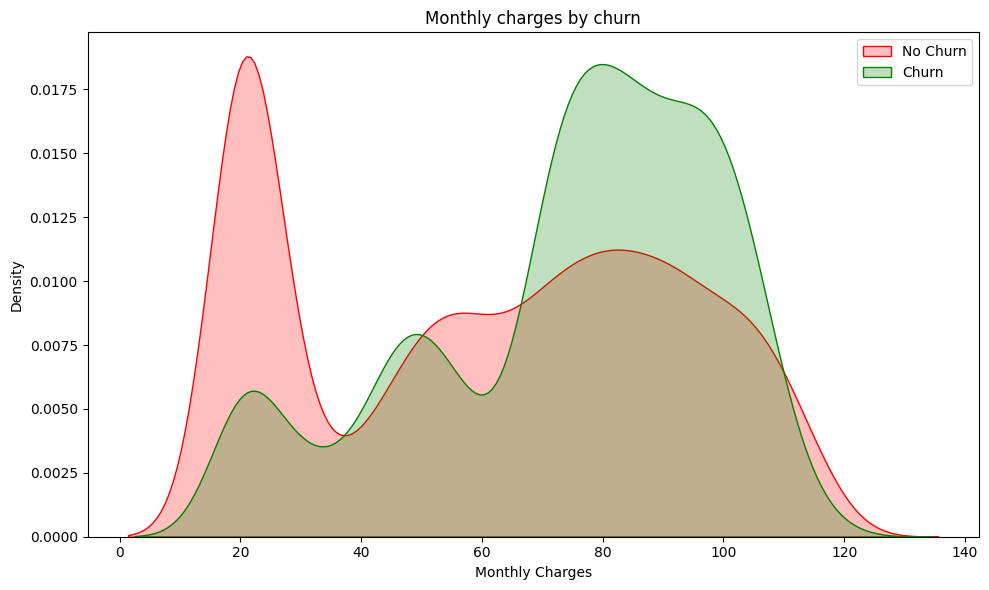

In [204]:
plt.figure(figsize = (10,6))
Fig = sns.kdeplot(df_dropped.monthly_charge[(df_dropped['churn'] == 0) ],
                color="Red", shade = True)
Fig = sns.kdeplot(df_dropped.monthly_charge[(df_dropped['churn'] == 1) ],
                ax =Fig, color="Green", shade= True)
Fig.legend(["No Churn","Churn"],loc='upper right')
Fig.set_ylabel('Density')
Fig.set_xlabel('Monthly Charges')
Fig.set_title('Monthly charges by churn')

plt.tight_layout()
plt.savefig('Monthly charges by Churn.png', bbox_inches = 'tight')
plt.show()

This graph tells us that as monthly charges increase, the churn also increases. But we need to interprete this graph carefully and with the context of our understanding of the churn behaviours of our three groups of customers and the monthly_charge distribution chart.  

From what we know about customers in this dataset, those on the one-year and two-year contracts are very loyal. However from our analysis of their monthly carges, we see that they pay as high as \\$118 per month meaning these customers would be positioned at the rightward band of this chart where churn seems to be occuring.  

However, we also see from customer churn behaviour that month-to-month customers are extremely likely to churn, and they also pay as high as \\$117 per month meanng they would also be positioned at the area of this graph where churn occurs.  

With these contexts I will infer that as the monthly charges of Month-to-Month customers increase, so does their likelyhood to churn.

**Relationship between long distance charges and churn**

<Axes: xlabel='avg_monthly_long_dist_charges', ylabel='Density'>

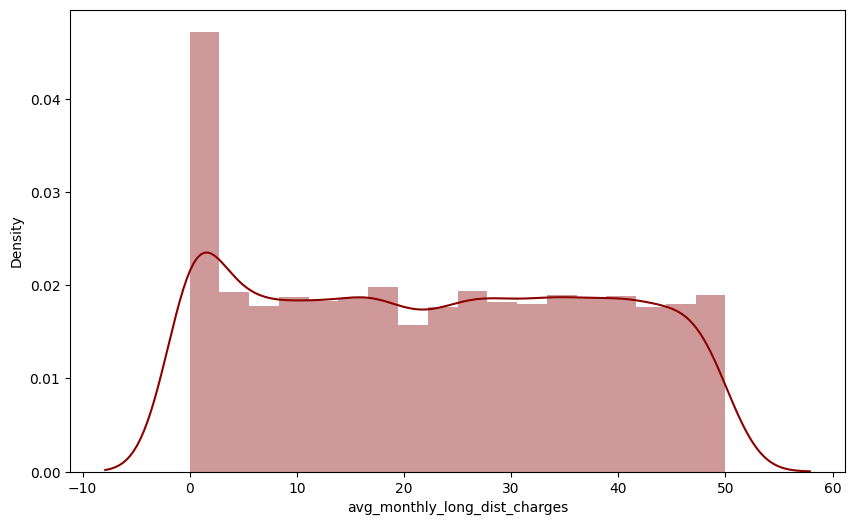

In [152]:
plt.figure(figsize = (10,6))
sns.distplot(df_dropped['avg_monthly_long_dist_charges'], color = "darkred")

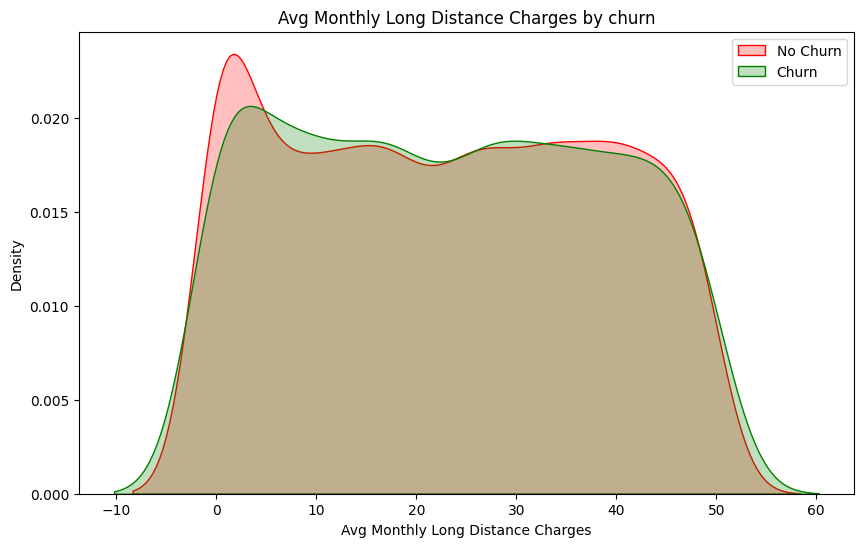

In [153]:
plt.figure(figsize = (10,6))
Fig = sns.kdeplot(df_dropped.avg_monthly_long_dist_charges[(df_dropped['churn'] == 0) ],
                color="Red", shade = True)
Fig = sns.kdeplot(df_dropped.avg_monthly_long_dist_charges[(df_dropped['churn'] == 1) ],
                ax =Fig, color="Green", shade= True)
Fig.legend(["No Churn","Churn"],loc='upper right')
Fig.set_ylabel('Density')
Fig.set_xlabel('Avg Monthly Long Distance Charges')
Fig.set_title('Avg Monthly Long Distance Charges by churn')
plt.show()

There's no much evidence to suggest that long distance charges affects or does not affect churn

**Relationship between extra data charges and churn**

In [154]:
df_dropped.avg_monthly_GB_download

0        8
1       18
2       26
3       25
4       42
        ..
7038    59
7039    24
7040    30
7041    30
7042     0
Name: avg_monthly_GB_download, Length: 7043, dtype: int64

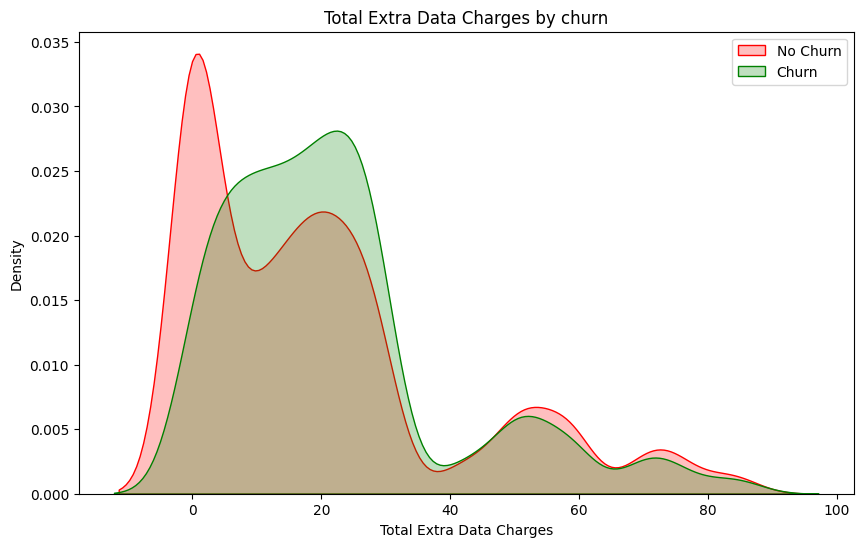

In [155]:
plt.figure(figsize = (10,6))
Fig = sns.kdeplot(df_dropped.avg_monthly_GB_download[(df_dropped['churn'] == 0) ],
                color="Red", shade = True)
Fig = sns.kdeplot(df_dropped.avg_monthly_GB_download[(df_dropped['churn'] == 1) ],
                ax =Fig, color="Green", shade= True)
Fig.legend(["No Churn","Churn"],loc='upper right')
Fig.set_ylabel('Density')
Fig.set_xlabel('Total Extra Data Charges')
Fig.set_title('Total Extra Data Charges by churn')
plt.show()

**Relationship between tenure_in_months and churn**

In [156]:
df_dropped.tenure_in_months.sort_values()

0        1
3677     1
3653     1
602      1
3628     1
        ..
687     72
3070    72
856     72
3144    72
510     72
Name: tenure_in_months, Length: 7043, dtype: int64

<Axes: xlabel='tenure_in_months', ylabel='Density'>

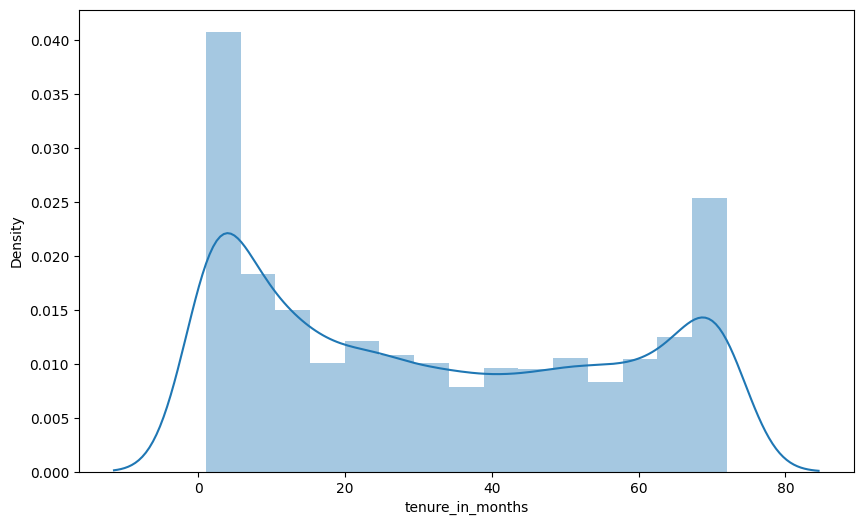

In [157]:
plt.figure(figsize = (10,6))
sns.distplot(df_dropped['tenure_in_months'])

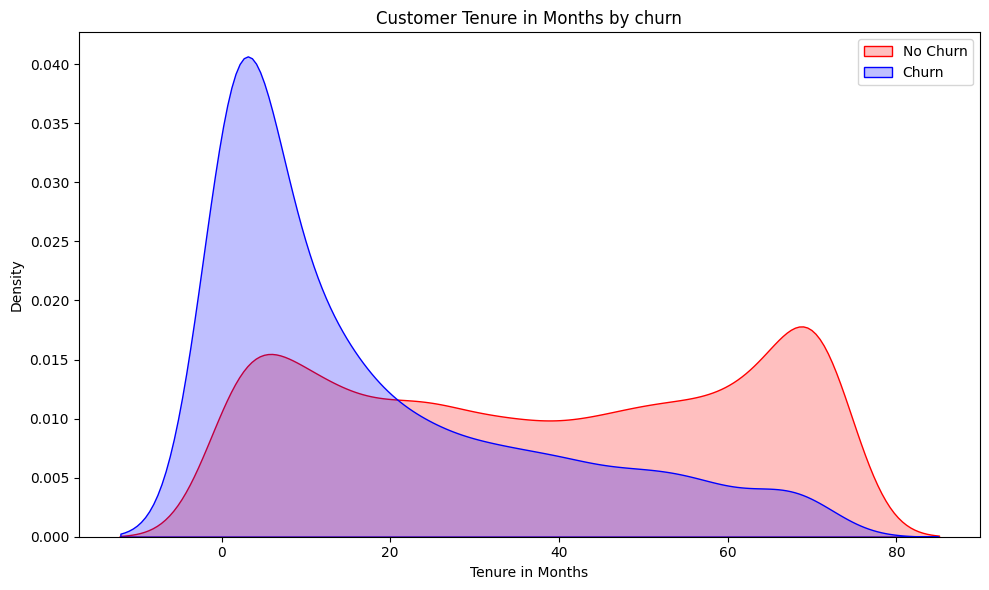

In [205]:
plt.figure(figsize = (10,6))
Fig = sns.kdeplot(df_dropped.tenure_in_months[(df_dropped['churn'] == 0) ],
                color="Red", shade = True)
Fig = sns.kdeplot(df_dropped.tenure_in_months[(df_dropped['churn'] == 1) ],
                ax =Fig, color="Blue", shade= True)
Fig.legend(["No Churn","Churn"],loc='upper right')
Fig.set_xlabel('Tenure in Months')
Fig.set_title('Customer Tenure in Months by churn')

plt.tight_layout()
plt.savefig('Customer Tenure in Months by Churn.png', bbox_inches = 'tight')
plt.show()

This graphs tells us that customers tend to churn in the early months of their tenure. We can analyze further to find specific range of months that customers churn.

In [166]:
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, float('inf')]

labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-27', '28-30', '31-33', '34-36', '36+']

df_dropped['tenure_in_months_binned'] = pd.cut(df_dropped['tenure_in_months'], bins=bins, labels=labels, right=True)

In [167]:
churned_df = df_dropped[df_dropped['churn'] == 1]
churned_df

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_dist_charges,multiple_lines,internet_service,internet_type,avg_monthly_GB_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason,tenure_in_months_binned
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1,91,Competitor,Competitor offered more data,1-3
5,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,Competitor,Competitor made better offer,7-9
7,3891-PUQOD,Female,40,No,No,No,Yes,3,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,No,0,1,None,Yes,13.58,No,Yes,DSL,24,No,No,Yes,No,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,59.20,59.20,0.00,0,13.58,72.78,1,1,65,Dissatisfaction,Service dissatisfaction,1-3
10,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,Competitor,Competitor made better offer,16-18
15,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,1,88,Dissatisfaction,Limited range of services,25-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,4174-LPGTI,Female,49,No,No,Yes,No,0,United States,California,Beaumont,92223,33.946982,-116.977672,17721,Q3,Yes,1,41,None,Yes,32.02,No,Yes,DSL,28,No,Yes,No,Yes,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,66.50,2728.60,0.00,0,1312.82,4041.42,3,1,65,Other,Moved,36+
5834,6304-IJFSQ,Male,63,No,No,No,No,0,United States,California,Calipatria,92233,33.143826,-115.497485,7857,Q3,No,0,3,None,Yes,46.57,No,Yes,Cable,16,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,49.90,130.10,0.00,0,139.71,269.81,3,1,73,Other,Moved,1-3
5839,5482-NUPNA,Female,28,Yes,No,No,No,0,United States,California,Imperial,92251,32.858595,-115.662709,14546,Q3,No,0,4,None,Yes,18.03,No,Yes,Cable,59,Yes,Yes,No,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,60.40,272.15,0.00,0,72.12,344.27,1,1,90,Competitor,Competitor had better devices,4-6
5843,1122-JWTJW,Male,64,No,No,Yes,Yes,2,United States,California,Ocotillo,92259,32.698964,-115.886656,471,Q3,Yes,1,1,None,Yes,37.68,No,Yes,Fiber Optic,26,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.65,70.65,0.00,0,37.68,108.33,1,1,82,Competitor,Competitor had better devices,1-3


In [168]:
df_tenure_count = churned_df.tenure_in_months_binned.value_counts().reset_index().rename(columns={'index':'months range', 'tenure_in_months_binned':'count'})

In [169]:
df_tenure_count

,months range,count
0,1-3,597
1,36+,358
2,4-6,187
3,7-9,139
4,10-12,114
5,13-15,99
6,16-18,78
7,22-24,63
8,19-21,54
9,25-27,51


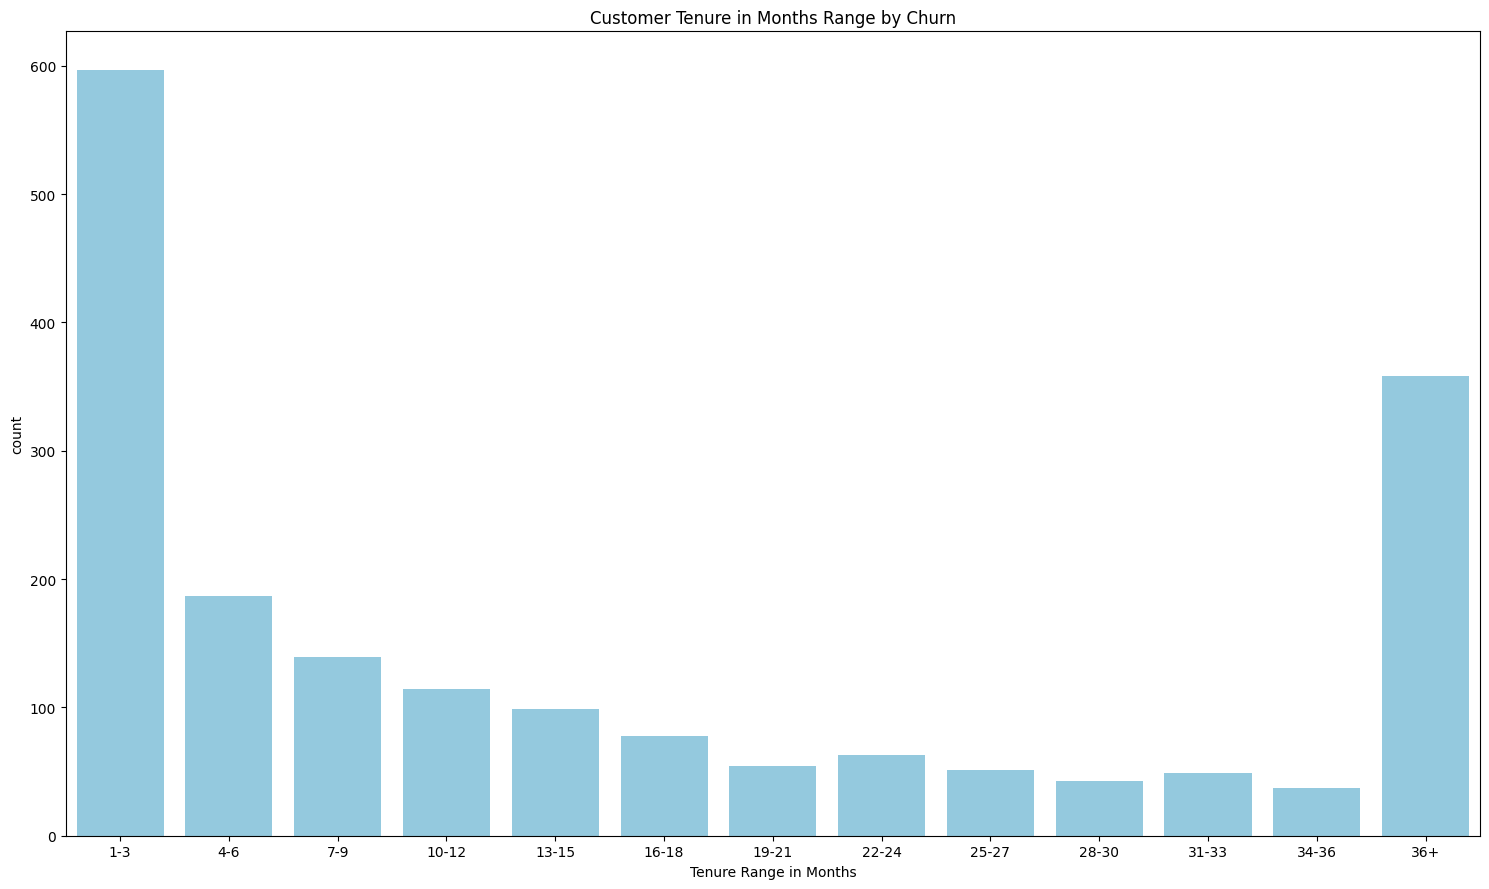

In [206]:
plt.figure(figsize=(15,9))
sns.barplot(data=df_tenure_count, x='months range', y='count', color='skyblue')

plt.xlabel('Tenure Range in Months')
plt.title('Customer Tenure in Months Range by Churn')

plt.tight_layout()
plt.savefig('Customer Tenure in Months Range by Churn.png', bbox_inches = 'tight')
plt.show()

From this chart, we see that most customers churn between the first 3 months of their tenure. This churn decreases as the customer's tenure increases.  

We should be careful to interprete the 36+ bar with caution because it represents churn numbers for a period of 3 years (year 2 - year 5). So it is only natural to seee such high number given the vast amount of time captured by that bar. The previous kde plot helps us put this bar graph into more perspective.

**Why customers churn according to reasons they give**

In [171]:
df_churned = df_dropped.loc[df_dropped['churn'] == 1]
df_churned_count = df_churned.churn_cat.value_counts().reset_index().rename(columns = {'index':'reason'})

In [172]:
df_churned_count

,reason,churn_cat
0,Competitor,841
1,Attitude,314
2,Dissatisfaction,303
3,Price,211
4,Other,200


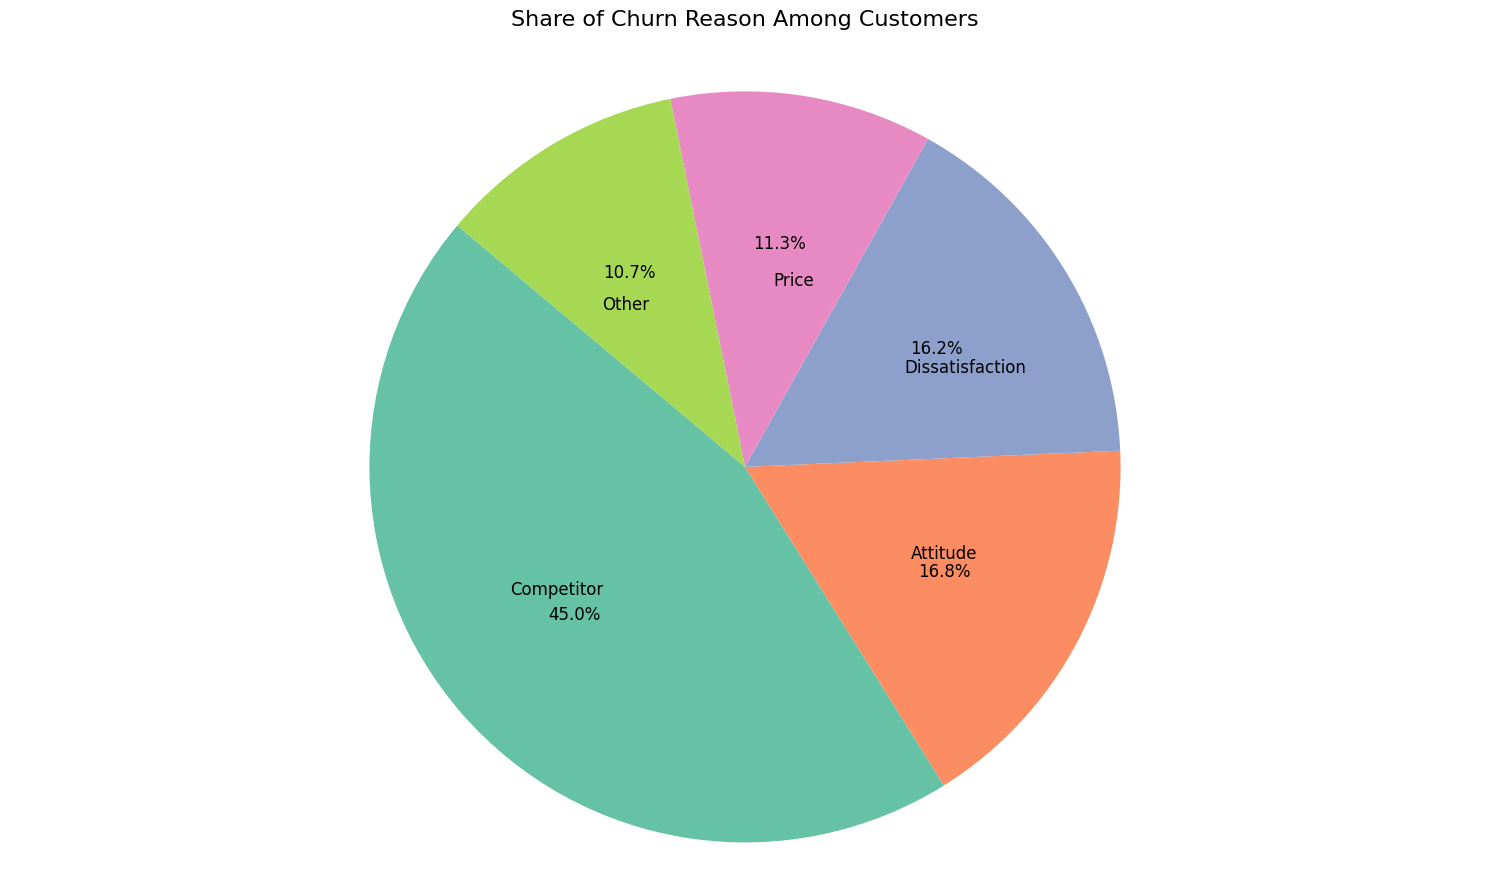

In [228]:
plt.figure(figsize=(15, 9))
plt.pie(df_churned_count['churn_cat'], labels=df_churned_count['reason'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('Set2'), labeldistance=0.5, pctdistance=0.6, textprops={'fontsize':12})
plt.axis('equal')  

plt.title(label='Share of Churn Reason Among Customers', fontdict={"fontsize":16}, pad=20)

plt.tight_layout()
plt.savefig('Share of Churn Reason Among Customers.png', bbox_inches = 'tight')
plt.show()

This chart gives an overview of why we are losing customers. According to this, 45% of the reason cutomers are churning is because of competitors.  

We can further analyse the data to see specific reasons and get more granular.

In [174]:
df_churned_reason_count = df_churned.churn_reason.value_counts().reset_index().rename(
    columns = {'index':'reason', 'churn_reason':'count'})
df_churned_reason_count

,reason,count
0,Competitor had better devices,313
1,Competitor made better offer,311
2,Attitude of support person,220
3,Don't know,130
4,Competitor offered more data,117
5,Competitor offered higher download speeds,100
6,Attitude of service provider,94
7,Price too high,78
8,Product dissatisfaction,77
9,Network reliability,72


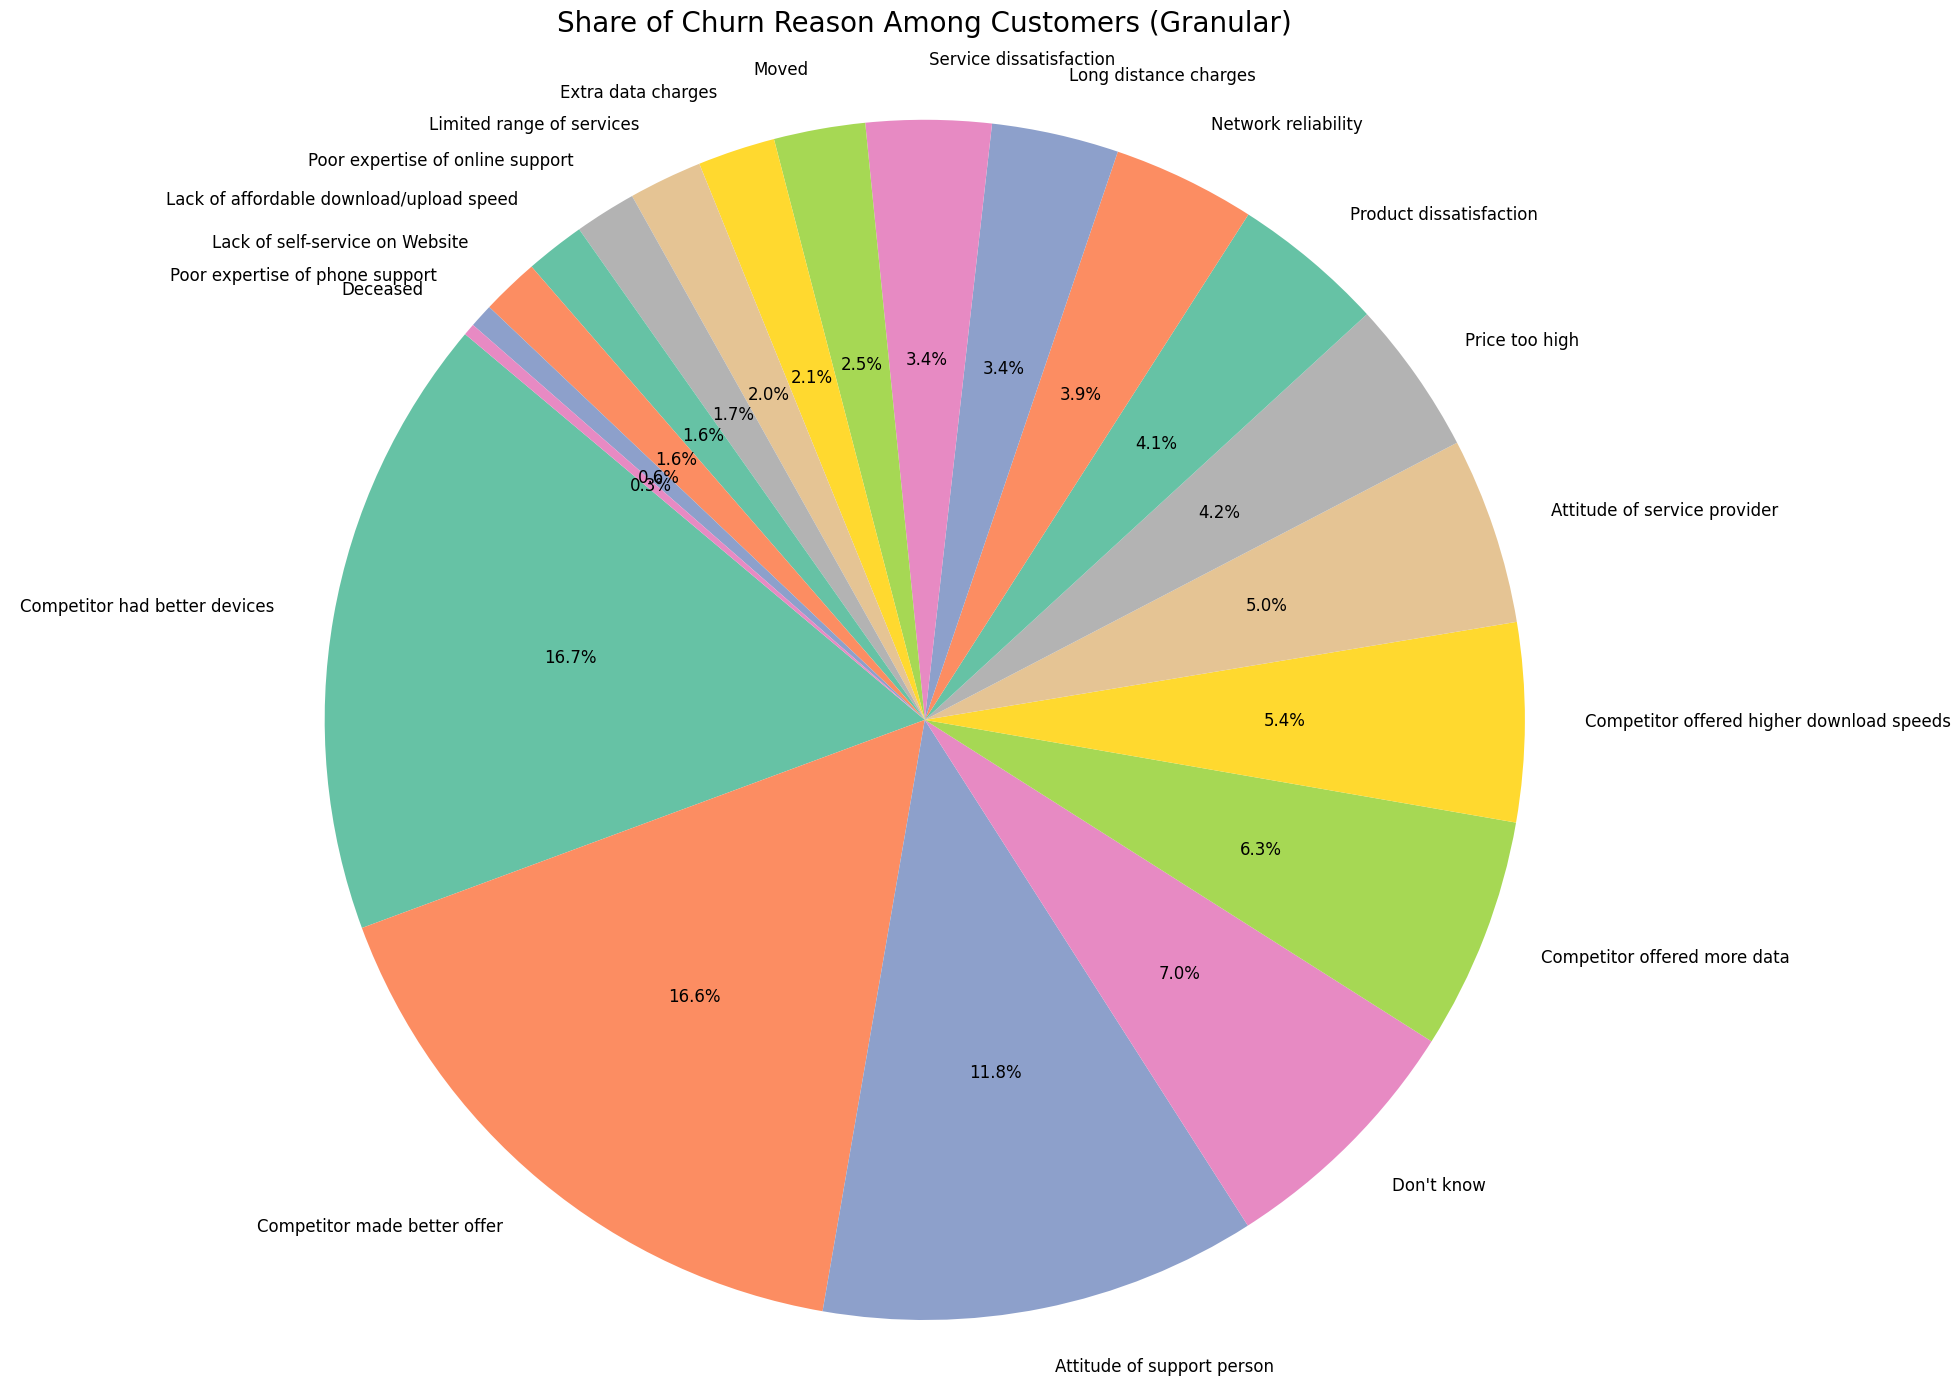

In [233]:
plt.figure(figsize=(20, 14))
plt.pie(df_churned_reason_count['count'], labels=df_churned_reason_count['reason'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('Set2'), textprops={'fontsize':12})
plt.axis('equal')  

plt.title(label='Share of Churn Reason Among Customers (Granular)', fontdict={"fontsize":20}, pad=20)

plt.tight_layout()
plt.savefig('Share of Churn Reason Among Customers (Granular).png', bbox_inches = 'tight')
plt.show()

Majority of the time, customers are churning because competitors have better devices and make better offers. Another thing we should be looking at is the customer support system. There seems to be an issue here because asides competitors, it represents the bulk of the reason why customers are churning.

In [ ]:
# Saving Dataframe to be used for Modelling
df_dropped.to_csv('EDA_dataframe.csv', index=False)